In [12]:
import pandas as pd

# Charger le fichier Excel fourni (m√™me sans Excel install√© gr√¢ce √† pandas)
file_path = r"C:\Users\PC\Desktop\manifest-1748607040736\TOMPEI-CMMD_clinical_data_v01_20250121 (1).xlsx"

# Lire toutes les feuilles disponibles dans le fichier Excel
xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names

# Afficher les noms des feuilles disponibles pour s√©lectionner la bonne
sheet_names


['README', 'Imaging Diagnosis Details Sheet', 'Lesion Details Sheet']

In [14]:
# Lire la feuille "Lesion Details Sheet" en ignorant les 2 premi√®res lignes
df_lesions = pd.read_excel(xls, sheet_name="Lesion Details Sheet", skiprows=2)

# Afficher les premi√®res vraies lignes de donn√©es
df_lesions.head()


ID1 LeftRight classification Number of lesions Unnamed: 4   FA lipoma  \
0  D1-0001         R         Benign                 1        NaN  NaN    NaN   
1  D1-0002         L         Benign                 1        NaN  NaN    NaN   
2  D1-0003         L         Benign                 1        NaN  NaN    NaN   
3  D1-0004         L         Benign                 1        NaN  NaN    NaN   
4  D1-0005         R         Benign                 1        NaN  NaN    NaN   

  Other mass calc  FAD dist mass calc.1  FAD.1  dist.1  invisible  \
0        NaN    1  NaN  NaN  NaN    NaN    NaN     NaN        NaN   
1        NaN    1  NaN  NaN  NaN    NaN    NaN     NaN        NaN   
2        NaN    1  NaN  NaN  NaN    NaN    NaN     NaN        NaN   
3        NaN    1  NaN  NaN  NaN    NaN    NaN     NaN        NaN   
4        NaN    1  NaN  NaN  NaN    NaN    NaN     NaN        NaN   

   Unnamed: 16 Exclusion reasons Unnamed: 18  
0          NaN               NaN         NaN  
1          NaN               NaN         NaN  
2          NaN               NaN         NaN  
3          NaN               NaN         NaN  
4          NaN               NaN         NaN

In [19]:
import os
import pandas as pd

json_root = r"C:\Users\PC\Desktop\manifest-1748607040736\TOMPEI-CMMD_v01_20250123"
dicom_root = r"C:\Users\PC\Desktop\manifest-1748607040736\CMMD"

# Fonction pour chercher le JSON correspondant √† une patiente
def find_annotation_file(patient_id, json_root):
    for fname in os.listdir(json_root):
        if fname.startswith(f"_{patient_id}") and fname.endswith(".json"):
            return os.path.join(json_root, fname)
    return None

# V√©rification
for idx, row in df_lesions.iterrows():
    patient_id = row['ID1']
    if pd.isna(patient_id): continue
    patient_id = str(patient_id).strip()

    dicom_path = os.path.join(dicom_root, patient_id)
    json_path = find_annotation_file(patient_id, json_root)

    print(f"[{patient_id}]")
    print("  üìÅ DICOM trouv√© :", os.path.exists(dicom_path))
    print("  üßæ Annotation trouv√©e :", json_path is not None)
    if json_path:
        print("     ‚Üí Fichier JSON :", os.path.basename(json_path))
    print()


[D1-0001]
  üìÅ DICOM trouv√© : True
  üßæ Annotation trouv√©e : False

[D1-0002]
  üìÅ DICOM trouv√© : True
  üßæ Annotation trouv√©e : False

[D1-0003]
  üìÅ DICOM trouv√© : True
  üßæ Annotation trouv√©e : False

[D1-0004]
  üìÅ DICOM trouv√© : True
  üßæ Annotation trouv√©e : False

[D1-0005]
  üìÅ DICOM trouv√© : True
  üßæ Annotation trouv√©e : False

[D1-0006]
  üìÅ DICOM trouv√© : True
  üßæ Annotation trouv√©e : False

[D1-0007]
  üìÅ DICOM trouv√© : True
  üßæ Annotation trouv√©e : False

[D1-0008]
  üìÅ DICOM trouv√© : True
  üßæ Annotation trouv√©e : False

[D1-0009]
  üìÅ DICOM trouv√© : True
  üßæ Annotation trouv√©e : False

[D1-0010]
  üìÅ DICOM trouv√© : True
  üßæ Annotation trouv√©e : False

[D1-0011]
  üìÅ DICOM trouv√© : True
  üßæ Annotation trouv√©e : False

[D1-0012]
  üìÅ DICOM trouv√© : True
  üßæ Annotation trouv√©e : False

[D1-0013]
  üìÅ DICOM trouv√© : True
  üßæ Annotation trouv√©e : False

[D1-0014]
  üìÅ DICOM trouv√© : True


In [23]:
def find_annotation_file(patient_id, json_root):
    for fname in os.listdir(json_root):
        if fname.startswith(patient_id) and fname.endswith(".json") and not fname.startswith("._"):
            return os.path.join(json_root, fname)
    return None


In [24]:
json_root = r"C:\Users\PC\Desktop\manifest-1748607040736\TOMPEI-CMMD_v01_20250123"
json_path = find_annotation_file("D2-0744", json_root)

if json_path:
    import json
    with open(json_path, "r", encoding="utf-8", errors="ignore") as f:
        data = json.load(f)

    print("‚úÖ JSON charg√© avec succ√®s")
    print(json.dumps(data, indent=2)[:1000])
else:
    print("‚ùå JSON non trouv√©")


‚úÖ JSON charg√© avec succ√®s
[
  {
    "cgPoints": [
      {
        "x": 10.8829803567736,
        "y": 863.3561307810667
      },
      {
        "x": 20.13223696173884,
        "y": 1532.3856918735505
      },
      {
        "x": 519.5920936298604,
        "y": 1532.3856918735505
      },
      {
        "x": 514.9674653273779,
        "y": 875.6884729210203
      },
      {
        "x": 12.424523124267807,
        "y": 869.5223018510435
      }
    ],
    "label": "dist",
    "_id": "DICOM_App__202301261925416150",
    "type": "Polyline",
    "color": "#15f40c"
  }
]


In [13]:
"""
Convertit r√©cursivement tous les .dcm du dossier CMMD/ en PNG 8-bits.
Chaque PNG est copi√© dans DATASET/images/ en conservant le patient et la sous-arborescence.
"""
import pydicom
import numpy as np
from pathlib import Path
from tqdm import tqdm
from PIL import Image

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 1) CHEMINS √Ä ADAPTER
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
SRC_ROOT = Path(r"C:\Users\PC\Desktop\manifest-1748607040736\CMMD")
DST_ROOT = Path(r"C:\Users\PC\Desktop\DATASET\images")
DST_ROOT.mkdir(parents=True, exist_ok=True)

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 2) BOUCLE DE CONVERSION
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
for dcm_path in tqdm(SRC_ROOT.rglob("*.dcm"), desc="DICOM‚ÜíPNG"):
    # Conserver la m√™me arborescence, changer l'extension en .png
    rel = dcm_path.relative_to(SRC_ROOT).with_suffix(".png")
    dst = DST_ROOT / rel
    dst.parent.mkdir(parents=True, exist_ok=True)

    # Lire le DICOM
    ds = pydicom.dcmread(dcm_path)
    arr = ds.pixel_array.astype(np.float32)

    # Remplacer arr.ptp() par np.ptp(arr) pour NumPy 2.0+
    plage = np.ptp(arr) + 1e-6
    arr_norm = (arr - arr.min()) / plage * 255.0

    # Sauvegarder en PNG 8-bits
    Image.fromarray(arr_norm.astype(np.uint8)).save(dst)


DICOM‚ÜíPNG: 5202it [08:23, 10.32it/s]


[WARN] Masque manquant pour : 1-1.png
[WARN] Masque manquant pour : 1-4.png


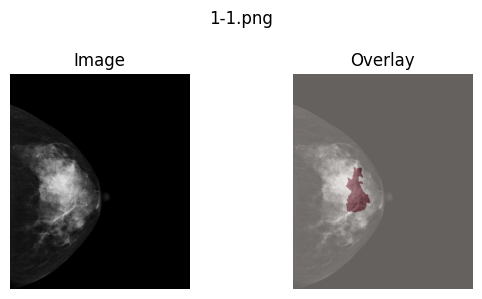

[WARN] Masque manquant pour : 1-2.png


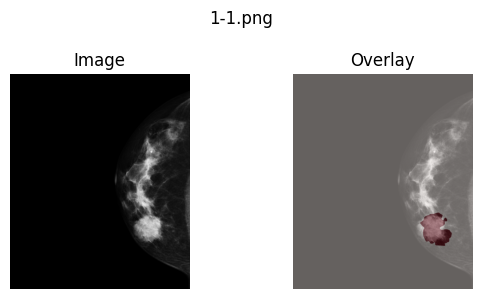

In [16]:
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import random

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 1) Chemin vers le dossier DATASET (contenant images/ et masks/)
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
ROOT = Path(r"C:\Users\PC\Desktop\DATASET")

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 2) R√©cup√©rer toutes les images PNG
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
all_imgs = list((ROOT / "images").rglob("*.png"))
if len(all_imgs) == 0:
    raise RuntimeError("Aucune image PNG trouv√©e dans DATASET/images. V√©rifiez le chemin.")

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 3) Afficher 5 exemples al√©atoires
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
for _ in range(5):
    img_path = random.choice(all_imgs)
    # Construire le chemin du masque correspondant :
    # si img_path = .../images/.../nom.png, 
    # alors mask_path = .../masks/.../nom_mask.png
    rel = img_path.relative_to(ROOT / "images")         # ex. "D1-0001/‚Ä¶/1-1.png"
    mask_path = ROOT / "masks" / rel.parent / f"{img_path.stem}_mask.png"
    if not mask_path.exists():
        print(f"[WARN] Masque manquant pour : {img_path.name}")
        continue

    # Ouvrir image et masque
    img = Image.open(img_path).convert("L")
    msk = Image.open(mask_path).convert("L")

    # Affichage c√¥te-√†-c√¥te
    plt.figure(figsize=(6, 3))
    plt.suptitle(img_path.name, fontsize=12)

    plt.subplot(1, 2, 1)
    plt.title("Image")
    plt.imshow(img, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Overlay")
    plt.imshow(img, cmap="gray")
    plt.imshow(msk, alpha=0.4, cmap="Reds")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


In [21]:
import torch
import numpy as np
import random
from pathlib import Path
from PIL import Image

# üëâ Assurez-vous d‚Äôavoir install√© SMP avant (pip install segmentation-models-pytorch)    
import segmentation_models_pytorch as smp
import torch.nn.functional as F
from torch.optim import AdamW
import torchvision.transforms as T

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 0) Choix du device (GPU si disponible, sinon CPU)
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Utilisation du device : {device}")

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 1) R√©pertoires DATASET/images & DATASET/masks
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
ROOT     = Path(r"C:\Users\PC\Desktop\DATASET")
IMG_DIR  = ROOT / "images"
MASK_DIR = ROOT / "masks"

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 2) Recenser uniquement les images ayant un masque existant
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
valid_imgs = []
for img_path in IMG_DIR.rglob("*.png"):
    rel = img_path.relative_to(IMG_DIR)  # ex. "D1-0001/.../1-4.png"
    mask_path = MASK_DIR / rel.parent / f"{img_path.stem}_mask.png"
    if mask_path.exists():
        valid_imgs.append((img_path, mask_path))

if len(valid_imgs) == 0:
    raise RuntimeError("Aucune image valide trouv√©e (aucun masque associ√©). V√©rifiez l‚Äôarborescence DATASET/images & DATASET/masks.")

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 3) Choisir al√©atoirement un couple (image, masque)
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
img_path, mask_path = random.choice(valid_imgs)
print(f"‚Üí Overfit sur : {img_path.relative_to(ROOT)}  &  {mask_path.relative_to(ROOT)}")

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 4) Charger et pr√©parer les tenseurs (redimension √† 256√ó256)
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# Charger l'image en niveaux de gris, puis ¬´ convertir ¬ª en RGB (3 canaux)
img_pil = Image.open(img_path).convert("L")
arr_img = np.array(img_pil, dtype=np.float32) / 255.0
arr_img = np.stack([arr_img, arr_img, arr_img], axis=2)  # shape = (H, W, 3)

# Charger le masque (0/255 ‚Üí binaire 0/1)
msk_pil = Image.open(mask_path).convert("L")
arr_mask = (np.array(msk_pil, dtype=np.uint8) > 0).astype(np.float32)  # shape = (H, W)

# Pr√©parer les transforms pour redimensionner √† 256√ó256
resize_img  = T.Resize((256, 256))
resize_mask = T.Resize((256, 256), interpolation=T.InterpolationMode.NEAREST)

# On repasse d‚Äôabord en PIL pour appliquer les transforms torchvision
img_tmp = Image.fromarray((arr_img * 255).astype(np.uint8))
msk_tmp = Image.fromarray((arr_mask * 255).astype(np.uint8))

img_resized = resize_img(img_tmp)   # PIL.Image en niveaux de gris converti en 3 canaux
msk_resized = resize_mask(msk_tmp)

# Conversion en tenseurs PyTorch
to_tensor = T.ToTensor()
img_t  = to_tensor(img_resized).unsqueeze(0).to(device)  # shape = (1, 3, 256, 256)
mask_t = to_tensor(msk_resized).unsqueeze(0).to(device)  # shape = (1, 1, 256, 256)

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 5) Instancier UNet, optimizer, loss composite (BCE+Dice via DiceLoss)
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
model = smp.Unet(
    encoder_name="resnet34",
    encoder_weights="imagenet",
    in_channels=3,
    classes=1
).to(device)

optimizer = AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)

# Instancier la DiceLoss (mode="binary")
dice_loss_fn = smp.losses.DiceLoss(mode="binary")

def loss_fn(pred, target):
    bce  = F.binary_cross_entropy_with_logits(pred, target)
    dice = dice_loss_fn(pred, target)
    return 0.5 * bce + 0.5 * dice

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 6) Boucle d‚Äôoverfit (200 it√©rations)
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
print("D√©but de l‚Äôoverfit-test (200 it√©rations)‚Ä¶")
model.train()
for i in range(200):
    optimizer.zero_grad()
    out  = model(img_t)           # logits (1,1,256,256)
    loss = loss_fn(out, mask_t)   # BCE + Dice
    loss.backward()
    optimizer.step()

    if (i + 1) % 50 == 0:
        with torch.no_grad():
            pred     = torch.sigmoid(out).cpu()
            pred_bin = (pred > 0.5).float()
            inter    = (pred_bin * mask_t.cpu()).sum()
            union    = pred_bin.sum() + mask_t.cpu().sum()
            dice_sc  = (2 * inter) / (union + 1e-8)
        print(f"Iter {i+1:3d} ‚Äî Loss: {loss.item():.4f}  Dice: {dice_sc.item():.4f}")

print("Overfit termin√©. Si Dice ‚â• 0.95 ‚Üí pipeline valid√© !")


Utilisation du device : cpu
‚Üí Overfit sur : images\D2-0298\07-18-2011-NA-NA-15504\1.000000-NA-71349\1-1.png  &  masks\D2-0298\07-18-2011-NA-NA-15504\1.000000-NA-71349\1-1_mask.png
D√©but de l‚Äôoverfit-test (200 it√©rations)‚Ä¶
Iter  50 ‚Äî Loss: 0.3468  Dice: 0.9372
Iter 100 ‚Äî Loss: 0.0624  Dice: 0.9846
Iter 150 ‚Äî Loss: 0.0171  Dice: 0.9992
Iter 200 ‚Äî Loss: 0.0100  Dice: 0.9986
Overfit termin√©. Si Dice ‚â• 0.95 ‚Üí pipeline valid√© !


In [4]:
import pydicom
import numpy as np
from pathlib import Path
from tqdm import tqdm
from PIL import Image

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 0) CHEMINS √Ä R√âGLER
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# Chemin racine o√π se trouvent vos DICOM (arborescence CMMD/<patient_id>/‚Ä¶)
CMMD_ROOT = Path(r"C:\Users\PC\Desktop\manifest-1748607040736\CMMD")

# Chemin racine o√π vous voulez placer les PNG (sera recr√©√© √† chaque run)
DST_ROOT = Path(r"C:\Users\PC\Desktop\DATASET\images")
DST_ROOT.mkdir(parents=True, exist_ok=True)

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 1) BOUCLE DE CONVERSION
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
for dcm_path in tqdm(CMMD_ROOT.rglob("*.dcm"), desc="Conversion DICOM‚ÜíPNG"):
    # 1.1) Lire le DICOM (y compris les pixels)
    ds = pydicom.dcmread(dcm_path, stop_before_pixels=False)

    # 1.2) Extraire le patient_id (le premier dossier sous CMMD_ROOT)
    try:
        patient_id = dcm_path.relative_to(CMMD_ROOT).parts[0]  # ex. "D1-0001"
    except Exception:
        patient_id = "UNKNOWN"

    # ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    # 1.3) D√âTERMINER LA VUE via ViewCodeSequence[0].CodeMeaning
    # ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    # Certains CodeMeaning qu‚Äôon a rencontr√©s : 
    #   - "cranio-caudal"
    #   - "mediolateral oblique"
    #   - "spot compression"
    #   - "ffdm view"
    #   - "cc"
    #   - "mlo"
    #   - ...
    view_pos = "UNKNOWNVIEW"
    if hasattr(ds, "ViewCodeSequence") and ds.ViewCodeSequence:
        item = ds.ViewCodeSequence[0]
        cm_raw = getattr(item, "CodeMeaning", "").strip().lower()
        # CF. toutes les variantes possibles que vous avez list√©es
        if "mediolateral" in cm_raw or "mlo" in cm_raw:
            view_pos = "MLO"
        elif "cranio" in cm_raw or "caudal" in cm_raw or cm_raw == "cc":
            view_pos = "CC"
        elif "spot compression" in cm_raw:
            view_pos = "SPOT"   # si vous voulez garder ces vues s√©par√©ment
        elif "ffdm" in cm_raw:
            view_pos = "FFDM"
        else:
            view_pos = "UNKNOWNVIEW"
    else:
        view_pos = "UNKNOWNVIEW"

    # ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    # 1.4) D√âTERMINER LA LAT√âRALIT√â (R ou L) via ImageLaterality
    # ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    lat = getattr(ds, "ImageLaterality", None)  # ex. "R" ou "L"
    lt  = lat.upper() if lat else ""            # "R" ou "L" ou "" si absent

    # ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    # 1.5) Construire le suffixe final "<VIEW>_<LAT>" (ex. "MLO_R")
    #           ou simplement "<VIEW>" si lt == ""
    # ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    vp     = view_pos.upper()                   # ex. "MLO", "CC", "SPOT", "FFDM" ou "UNKNOWNVIEW"
    suffix = f"{vp}_{lt}" if lt else vp         # ex. "MLO_R", "CC_L", "SPOT_R", ...

    # ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    # 1.6) R√©cup√©rer le pixel_array DICOM (float32), normaliser [0‚Üí255], convertir en uint8
    # ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    arr      = ds.pixel_array.astype(np.float32)
    mn, mx   = arr.min(), np.ptp(arr) + 1e-6
    arr_norm = ((arr - mn) / mx * 255.0).astype(np.uint8)

    # ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    # 1.7) Construire le chemin de sortie, en recr√©ant l‚Äôarborescence patient_id / subfolder
    #        sous DST_ROOT. Par exemple :
    #          DICOM : CMMD/D1-0001/07-18-2010-NA-NA-79377/1-1.dcm
    #          PNG   : DATASET/images/D1-0001/07-18-2010-NA-NA-79377/MLO_R_1-1.png
    # ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    rel_dcm   = dcm_path.relative_to(CMMD_ROOT)          # ex. "D1-0001/07-18-2010-.../1-1.dcm"
    subfolder = rel_dcm.parent.relative_to(patient_id)   # ex. "07-18-2010-NA-NA-79377"
    dst_dir   = DST_ROOT / patient_id / subfolder
    dst_dir.mkdir(parents=True, exist_ok=True)

    base_name = dcm_path.stem                           # ex. "1-1"
    dst_name  = f"{suffix}_{base_name}.png"              # ex. "MLO_R_1-1.png"
    dst_path  = dst_dir / dst_name

    # ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    # 1.8) Sauvegarder le PNG 8-bits
    # ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    Image.fromarray(arr_norm).save(dst_path)


Conversion DICOM‚ÜíPNG: 5202it [07:53, 10.99it/s]


In [7]:
import pydicom, numpy as np, re
from pathlib import Path
from PIL import Image
from tqdm import tqdm

CMMD_ROOT = Path(r"C:\Users\PC\Desktop\manifest-1748607040736\CMMD")
OUT_ROOT  = Path(r"C:\Users\PC\Desktop\DATASET_CLEAN\images")

# vues possiblement pr√©sentes dans vos CodeMeaning
VIEW_RULES = [
    (re.compile(r"mediolateral|mlo", re.I), "MLO"),
    (re.compile(r"cranio|caudal|^cc$", re.I), "CC"),
    (re.compile(r"spot\s+compression", re.I), "SPOT"),
    (re.compile(r"ffdm", re.I), "FFDM"),
]

for dcm in tqdm(CMMD_ROOT.rglob("*.dcm"), desc="DICOM‚ÜíPNG"):
    ds = pydicom.dcmread(dcm, stop_before_pixels=False)

    # patient id = premier dossier apr√®s CMMD
    rel        = dcm.relative_to(CMMD_ROOT)
    patient_id = rel.parts[0]                     # ex. D1-0001
    subfolders = Path(*rel.parts[1:-1])           # tout le reste sauf fichier

    # -------- vue ----------
    view = "UNKNOWNVIEW"
    if getattr(ds, "ViewCodeSequence", None):
        cm = ds.ViewCodeSequence[0].CodeMeaning.strip()
        for pattern, label in VIEW_RULES:
            if pattern.search(cm):
                view = label
                break

    # -------- lat√©ralit√© ----------
    lat = getattr(ds, "ImageLaterality", "").upper()  # 'R', 'L' ou ''
    suffix = f"{view}_{lat}" if lat else view

    # -------- pixels ----------
    arr = ds.pixel_array.astype(np.float32)
    arr = ((arr - arr.min()) / (np.ptp(arr) + 1e-6) * 255).astype(np.uint8)

    # -------- sortie ----------
    out_dir  = OUT_ROOT / patient_id / subfolders
    out_dir.mkdir(parents=True, exist_ok=True)
    out_name = f"{suffix}_{dcm.stem}.png"
    Image.fromarray(arr).save(out_dir / out_name)


DICOM‚ÜíPNG: 5202it [07:47, 11.12it/s]


In [8]:
import json, numpy as np, re
from pathlib import Path
from PIL import Image, ImageDraw
from tqdm import tqdm

ANNO_ROOT = Path(r"C:\Users\PC\Desktop\manifest-1748607040736\TOMPEI-CMMD_v01_20250123")
IMG_ROOT  = Path(r"C:\Users\PC\Desktop\DATASET_CLEAN\images")
MSK_ROOT  = Path(r"C:\Users\PC\Desktop\DATASET_CLEAN\masks")
MSK_ROOT.mkdir(parents=True, exist_ok=True)

rx = re.compile(r"^(D\d-\d{4})_(MLO|CC|SPOT|FFDM)_(R|L)_AnnotationFile", re.I)

for json_path in tqdm(ANNO_ROOT.glob("*.json"), desc="JSON‚Üímask"):
    m = rx.match(json_path.stem)
    if not m:          # ignore les noms ._D1-####...
        continue
    pid, view, lat = m.groups()
    suffix = f"{view.upper()}_{lat.upper()}"      # ex. MLO_R

    # Chercher l'image correspondante
    pngs = sorted((IMG_ROOT / pid).rglob(f"{suffix}_*.png"))
    if not pngs:
        continue        # pas d'image pour cette annotation
    img_path = pngs[0]  # prend la premi√®re (1-1)

    w, h = Image.open(img_path).size

    with open(json_path, encoding="utf-8") as f:
        anns = json.load(f)

    mask = Image.new("L", (w, h), 0)
    dr   = ImageDraw.Draw(mask)
    for ann in anns:
        pts = [(p["x"], p["y"]) for p in ann.get("cgPoints", [])]
        if len(pts) >= 3:
            dr.polygon(pts, outline=1, fill=1)

    out_mask = MSK_ROOT / img_path.relative_to(IMG_ROOT).parent / f"{img_path.stem}_mask.png"
    out_mask.parent.mkdir(parents=True, exist_ok=True)
    Image.fromarray(np.array(mask)*255).save(out_mask)


JSON‚Üímask: 2770it [00:00, 5334.38it/s] 


In [14]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
build_dataset.py

Pipeline complet de preprocessing :
  1) Vide et recr√©e les dossiers DATASET_CLEAN/images et DATASET_CLEAN/masks
  2) Pour chaque JSON d‚Äôannotation, trouve les DICOM correspondants (vue + lat)
  3) Convertit chaque DICOM retenu en PNG 8 bits 0‚Äì255
  4) G√©n√®re le masque binaire √† partir des coordonn√©es du JSON (cgPoints)
  5) Sauve image et masque dans DATASET_CLEAN/images & DATASET_CLEAN/masks

Usage :
    python build_dataset.py
"""

import os
import shutil
import json
import numpy as np
import re
from pathlib import Path
from PIL import Image, ImageDraw
from tqdm import tqdm
import pydicom

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 0) CHEMINS √Ä ADAPTER (s‚Äôassurer que tous les dossiers existent)
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

# Dossier racine contenant tous les DICOM : CMMD/<patient_id>/.../*.dcm
CMMD_ROOT = Path(r"C:\Users\PC\Desktop\manifest-1748607040736\CMMD")

# Dossier racine contenant tous les JSON d‚Äôannotation :
# (ex. D1-0001_MLO_R_AnnotationFile.json, D1-0002_CC_L_AnnotationFile.json, etc.)
ANNOT_ROOT = Path(r"C:\Users\PC\Desktop\manifest-1748607040736\TOMPEI-CMMD_v01_20250123")

# Dossier o√π sera g√©n√©r√© le dataset final : images PNG et masques PNG
DATASET_ROOT = Path(r"C:\Users\PC\Desktop\DATASET_CLEAN")
IMG_ROOT = DATASET_ROOT / "images"
MSK_ROOT = DATASET_ROOT / "masks"

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 1) PREPARE LES DOSSIERS images/ ET masks/
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

# Si les dossiers existaient, on les supprime pour repartir propre
if IMG_ROOT.exists():
    shutil.rmtree(IMG_ROOT)   # supprime tout le dossier images/
if MSK_ROOT.exists():
    shutil.rmtree(MSK_ROOT)   # supprime tout le dossier masks/

# Puis on les recr√©e, vides
IMG_ROOT.mkdir(parents=True, exist_ok=True)   # cr√©√© DATASET_CLEAN/images
MSK_ROOT.mkdir(parents=True, exist_ok=True)   # cr√©√© DATASET_CLEAN/masks

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 2) PATRON POUR RECONNA√éTRE LES JSON UTILES
#    ex. : D1-0001_MLO_R_AnnotationFile.json
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
PATTERN_JSON = re.compile(
    r"^(D\d-\d{4})_(MLO|CC|SPOT|FFDM)_(R|L)_AnnotationFile\.json$", re.IGNORECASE
)

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 3) FONCTION DE MATCH DICOM ‚Üí view/lat du JSON
#    Elle lit stop_before_pixels=True pour ne charger que les m√©tadonn√©es
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
def dicom_matches(dcm_path: Path, expected_view: str, expected_lat: str) -> bool:
    """
    V√©rifie si le fichier DICOM correspond exactement √† la vue (MLO/CC/SPOT/FFDM)
    et √† la lat√©ralit√© (R/L) attendues (extraites du nom du JSON).

    expected_view : "MLO" ou "CC" ou "SPOT" ou "FFDM"
    expected_lat  : "R" ou "L"
    """
    try:
        ds = pydicom.dcmread(dcm_path, stop_before_pixels=True)
    except Exception:
        return False

    # 1) V√©rifier la lat√©ralit√©
    lat = getattr(ds, "ImageLaterality", "").upper()
    if lat != expected_lat.upper():
        return False

    # 2) R√©cup√©rer le CodeMeaning en minuscules
    cm = ""
    if hasattr(ds, "ViewCodeSequence") and ds.ViewCodeSequence:
        cm = ds.ViewCodeSequence[0].CodeMeaning.strip().lower()

    # 3) Comparer au cas par cas (exact)
    v = expected_view.upper()
    if v == "MLO":
        # Correspond exactement au contenu inspect√© : "medio-lateral oblique"
        return ("medio-lateral oblique" in cm)
    if v == "CC":
        return ("cranio-caudal" in cm)
    if v == "SPOT":
        return ("spot compression" in cm or "spot-compression" in cm)
    if v == "FFDM":
        return ("ffdm" in cm)

    return False

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 4) BOUCLE PRINCIPALE : pour chaque JSON, trouver les DICOM et g√©n√©rer PNG + masque
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

for json_f in tqdm(sorted(ANNOT_ROOT.glob("*.json")), desc="Traitement JSON‚ÜíPNG+MASK"):
    m = PATTERN_JSON.match(json_f.name)
    if not m:
        # fichiers du type "._D1-0001_‚Ä¶" sont ignor√©s
        continue

    patient_id, view, lat = m.groups()
    view = view.upper()   # ex. "MLO"
    lat  = lat.upper()    # ex. "R"

    # Charger la liste d‚Äôannotations depuis le JSON
    with open(json_f, encoding="utf-8") as f:
        anns = json.load(f)   # liste de { "cgPoints": [ { "x": X, "y": Y }, ... ] , ... }

    # 4.1) Trouver tous les DICOM du patient qui correspondent √† view+lat
    patient_dir = CMMD_ROOT / patient_id
    if not patient_dir.exists():
        # Si le patient_id n‚Äôexiste pas sous CMMD, on passe
        continue

    candidats = []
    for dcm_path in patient_dir.rglob("*.dcm"):
        if dicom_matches(dcm_path, view, lat):
            candidats.append(dcm_path)

    if not candidats:
        # Aucun DICOM trouv√© pour ce JSON (warning pour debug, peut √™tre d√©sactiv√©)
        print(f"‚ö†Ô∏è  {patient_id} {view}_{lat} : aucun DICOM trouv√©.")
        continue

    # 4.2) Pour chaque DICOM retenu, convertir en PNG + g√©n√©rer le masque
    for dcm_path in candidats:
        # Ex. rel = Path("D1-0001/07-18-2010-NA-NA-79377/1.000000-NA-70244/1-2.dcm")
        rel = dcm_path.relative_to(CMMD_ROOT)
        stem = dcm_path.stem  # ex. "1-2"
        # On veut recr√©er le m√™me chemin sous IMG_ROOT/MASK_ROOT, sans le patient_id
        # subf = Path("07-18-2010-NA-NA-79377/1.000000-NA-70244")
        subf = rel.parent.relative_to(patient_id)

        # 4.2.1) Cr√©er les dossiers de sortie pour l‚Äôimage et le masque
        out_img_dir = IMG_ROOT / patient_id / subf
        out_msk_dir = MSK_ROOT / patient_id / subf
        out_img_dir.mkdir(parents=True, exist_ok=True)
        out_msk_dir.mkdir(parents=True, exist_ok=True)

        # ‚îÄ‚îÄ‚îÄ Conversion DICOM ‚Üí PNG 8 bits ‚îÄ‚îÄ‚îÄ
        ds = pydicom.dcmread(dcm_path, stop_before_pixels=False)
        arr = ds.pixel_array.astype(np.float32)  # [0..max] en float32 :contentReference[oaicite:3]{index=3}
        mn, mx = arr.min(), np.ptp(arr) + 1e-6
        arr8 = ((arr - mn) / mx * 255.0).astype(np.uint8)  # [0..255] uint8 :contentReference[oaicite:4]{index=4}

        out_img_path = out_img_dir / f"{view}_{lat}_{stem}.png"
        Image.fromarray(arr8).save(out_img_path)  # sauvegarde PNG :contentReference[oaicite:5]{index=5}

        # ‚îÄ‚îÄ‚îÄ Cr√©ation du masque binaire (0/255) √† partir du JSON ‚îÄ‚îÄ‚îÄ
        h, w = arr8.shape  # hauteur, largeur
        mask = Image.new("L", (w, h), 0)  # image binaire (noir=0) :contentReference[oaicite:6]{index=6}
        draw = ImageDraw.Draw(mask)

        # On trace un polygone pour chaque entr√©e "cgPoints"
        for ann in anns:
            pts = [(int(p["x"]), int(p["y"])) for p in ann.get("cgPoints", [])]
            if len(pts) >= 3:
                draw.polygon(pts, outline=1, fill=1)  # 1=binaire=masque :contentReference[oaicite:7]{index=7}

        out_msk_path = out_msk_dir / f"{view}_{lat}_{stem}_mask.png"
        # Multiplier *255 pour obtenir 0/255 (PNG binaire)
        Image.fromarray(np.array(mask) * 255).save(out_msk_path)

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
print("‚úÖ Pipeline JSON‚ÜíPNG+mask termin√©e. Regarder dans DATASET_CLEAN/images et DATASET_CLEAN/masks.")


Traitement JSON‚ÜíPNG+MASK: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2770/2770 [02:41<00:00, 17.11it/s]  

‚úÖ Pipeline JSON‚ÜíPNG+mask termin√©e. Regarder dans DATASET_CLEAN/images et DATASET_CLEAN/masks.


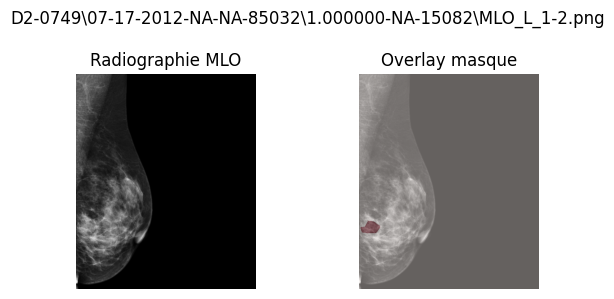

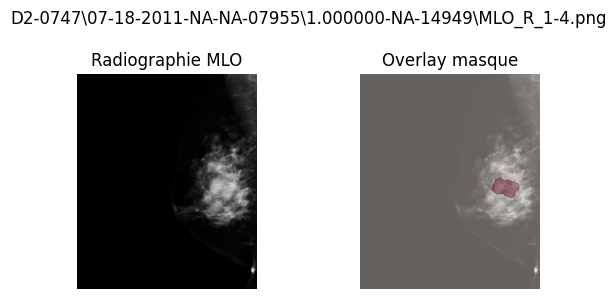

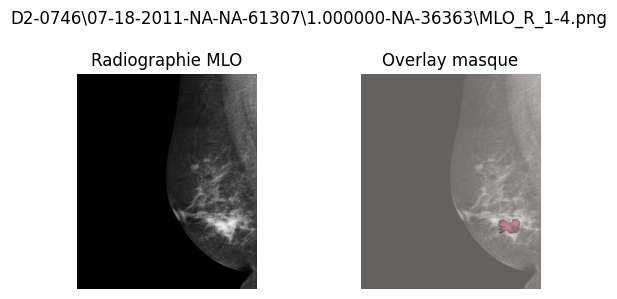

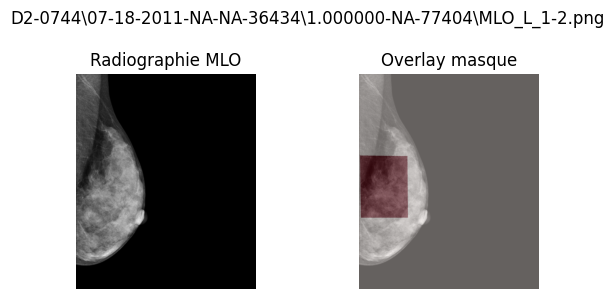

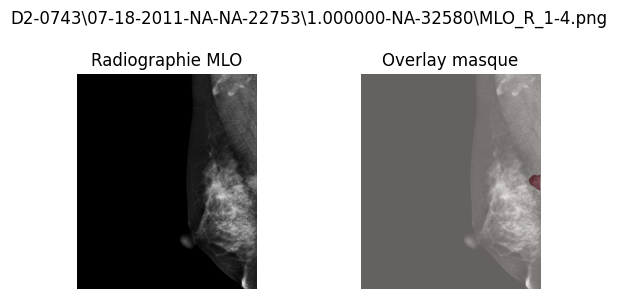

In [15]:
import os
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# SCRIPT DE VISUALISATION DE LA SUPERPOSITION DU MASQUE SUR LES IMAGES MLO
#
# 1) Modifiez les variables IMG_ROOT et MSK_ROOT pour refl√©ter les chemins
#    vers vos dossiers 'images' et 'masks' g√©n√©r√©s par le preprocessing.
# 2) Ex√©cutez ce script pour afficher jusqu'√† 5 exemples d'images MLO + masque.
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

# 1) CHEMINS √Ä MODIFIER SI N√âCESSAIRE
IMG_ROOT = Path(r"C:\Users\PC\Desktop\DATASET_CLEAN\images")
MSK_ROOT = Path(r"C:\Users\PC\Desktop\DATASET_CLEAN\masks")

# 2) Collecte des paires (image, masque) uniquement pour les vues MLO
pairs = []
for img_path in IMG_ROOT.rglob("MLO_*_*.png"):
    # Ignorer les fichiers suffix√©s "_mask.png"
    if img_path.stem.endswith("_mask"):
        continue
    # Construire le chemin du masque correspondant
    mask_path = MSK_ROOT / img_path.relative_to(IMG_ROOT).parent / f"{img_path.stem}_mask.png"
    if mask_path.exists():
        pairs.append((img_path, mask_path))

# 3) V√©rifier la pr√©sence de paires
if not pairs:
    print("‚ö†Ô∏è Aucun couple image MLO/masque trouv√©. V√©rifiez vos chemins et que le preprocessing a bien g√©n√©r√© des fichiers.")
else:
    # 4) Afficher jusqu'√† 5 exemples al√©atoires
    sample_size = min(5, len(pairs))
    for img_path, mask_path in pairs[:sample_size]:
        img = Image.open(img_path).convert("L")
        msk = Image.open(mask_path).convert("L")
        
        plt.figure(figsize=(6, 3))
        plt.suptitle(str(img_path.relative_to(IMG_ROOT)))
        
        # Affichage de la radiographie seule
        plt.subplot(1, 2, 1)
        plt.title("Radiographie MLO")
        plt.imshow(img, cmap="gray")
        plt.axis("off")
        
        # Affichage de la radiographie avec le masque superpos√©
        plt.subplot(1, 2, 2)
        plt.title("Overlay masque")
        plt.imshow(img, cmap="gray")
        plt.imshow(msk, alpha=0.4, cmap="Reds")
        plt.axis("off")
        
        plt.tight_layout()
        plt.show()


In [ ]:
# train_segmentation.py
# Entra√Ænement U-Net ¬´ classique ¬ª (impl√©mentation maison) sur RTX 4060

import os
import random
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW

import albumentations as A
from albumentations.pytorch import ToTensorV2

from tqdm import tqdm


# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 0) CONFIGURATION G√âN√âRALE + OPTIMISATIONS GPU/CPU
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
DATA_ROOT   = Path(r"C:\Users\PC\Desktop\DATASET_CLEAN")
IMAGE_ROOT  = DATA_ROOT / "images"
MASK_ROOT   = DATA_ROOT / "masks"

SAVE_MODELS = Path(r"C:\Users\PC\Desktop\models")
SAVE_MODELS.mkdir(parents=True, exist_ok=True)

BATCH_SIZE      = 32     # RTX 4060 (8 Go) OK pour 256√ó256√ó32
IMG_SIZE        = 256
NUM_EPOCHS      = 30
LR              = 1e-3
WEIGHT_DECAY    = 1e-4
PATIENCE_LR     = 3
PATIENCE_ES     = 5

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if DEVICE.type == "cuda":
    torch.backends.cudnn.benchmark = True

print(f"üöÄ Device utilis√© : {DEVICE}")

NUM_WORKERS = 5
print(f"üíæ CPU cores : {os.cpu_count()} | DataLoader workers : {NUM_WORKERS}")

USE_AMP = DEVICE.type == "cuda"


# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 1) DATASET PYTORCH POUR CMMD (images PNG & masques)
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
class CMMDataset(Dataset):
    """
    Prend en entr√©e une liste de chemins d‚Äôimages PNG (image + masque align√©).
    - Chaque image PNG doit avoir un masque correspondant avec suffixe '_mask.png'
      dans un dossier identique sous masks/.
    """
    def __init__(self, img_paths, transform=None):
        self.img_paths  = img_paths
        self.mask_paths = [
            Path(str(p).replace(
                os.path.join("images", ""),
                os.path.join("masks", "")
            )).with_name(p.stem + "_mask.png")
            for p in img_paths
        ]
        self.transform = transform

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        img = np.array(Image.open(self.img_paths[idx]).convert("RGB"))
        msk = np.array(Image.open(self.mask_paths[idx]).convert("L"))  # 0‚Äì255

        if self.transform:
            augmented = self.transform(image=img, mask=msk)
            img_t = augmented["image"]
            msk_t = augmented["mask"].unsqueeze(0).float()  # (1, H, W)
        else:
            img_t = torch.from_numpy(img.transpose(2, 0, 1) / 255.0).float()
            msk_t = torch.from_numpy((msk > 0).astype(np.float32)).unsqueeze(0)
        return img_t, msk_t


# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 2) SPLIT TRAIN/VAL PAR PATIENT
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
def split_dataset_by_patient(root_images: Path, val_frac: float = 0.2, seed: int = 42):
    """
    - Scanne root_images (= DATA_ROOT/images/<patient_id>/.../*.png).
    - Regroupe par patient_id (dossier juste apr√®s "images/").
    - Shuffle + split sur patient_id, pour que train/val n‚Äôaient pas de patients communs.
    - Renvoie deux listes de chemins : train_paths, val_paths.
    """
    random.seed(seed)
    all_img_paths = list(root_images.rglob("*.png"))
    patients_dict = {}
    for p in all_img_paths:
        patient_id = p.relative_to(root_images).parts[0]
        patients_dict.setdefault(patient_id, []).append(p)

    patient_ids = list(patients_dict.keys())
    random.shuffle(patient_ids)

    n_val = int(len(patient_ids) * val_frac)
    val_ids = set(patient_ids[:n_val])
    train_ids = set(patient_ids[n_val:])

    train_paths, val_paths = [], []
    for pid, paths in patients_dict.items():
        if pid in train_ids:
            train_paths.extend(paths)
        else:
            val_paths.extend(paths)

    return train_paths, val_paths


# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 3) TRANSFORMS ALBUMENTATIONS (AUGMENTATIONS + NORMALISATION IMAGENET + ToTensor)
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
def get_transforms():
    mean = (0.485, 0.456, 0.406)
    std  = (0.229, 0.224, 0.225)

    train_transform = A.Compose([
        A.Resize(IMG_SIZE, IMG_SIZE),

        # Utilisation de A.Affine pour √©viter le warning ¬´ ShiftScaleRotate is a special case of Affine ¬ª
        A.Affine(
            scale=(0.9, 1.1),
            translate_percent=(-0.06, 0.06),
            rotate=(-15, 15),
            p=0.5
        ),

        A.HorizontalFlip(p=0.5),
        A.RandomRotate90(p=0.5),

        # Albumentations ‚â•1.3 accepte var_limit sans warning
        A.GaussNoise(var_limit=(10.0, 50.0), p=0.4),

        A.RandomBrightnessContrast(p=0.3),
        A.Normalize(mean=mean, std=std),
        ToTensorV2(),
    ], additional_targets={"mask": "mask"})

    val_transform = A.Compose([
        A.Resize(IMG_SIZE, IMG_SIZE),
        A.Normalize(mean=mean, std=std),
        ToTensorV2(),
    ], additional_targets={"mask": "mask"})

    return train_transform, val_transform


# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 4) M√âTRIQUES : Dice & IoU
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
def compute_metrics(pred: torch.Tensor, target: torch.Tensor, threshold: float = 0.5):
    """
    Calcule Dice et IoU sur un batch.
    - pred : logits (B,1,H,W)
    - target : ground truth binaires (B,1,H,W)
    """
    pred_prob = torch.sigmoid(pred)
    pred_bin  = (pred_prob > threshold).float()

    B = pred_bin.size(0)
    pred_flat = pred_bin.view(B, -1)
    tgt_flat  = target.view(B, -1)

    intersection = (pred_flat * tgt_flat).sum(dim=1)
    union        = pred_flat.sum(dim=1) + tgt_flat.sum(dim=1)
    dice = ((2 * intersection + 1e-8) / (union + 1e-8)).mean().item()

    union_inter = (pred_flat + tgt_flat).clamp(0, 1).sum(dim=1)
    iou = (intersection / (union_inter + 1e-8)).mean().item()
    return dice, iou


# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 5) D√âFINITION DE L‚ÄôARCHITECTURE U-Net ¬´ CLASSIQUE ¬ª
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
class DoubleConv(nn.Module):
    """
    Double bloc de convolution : (Conv ‚Üí BN ‚Üí ReLU) √ó 2
    """
    def __init__(self, in_ch, out_ch):
        super().__init__()
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        return self.double_conv(x)


class UNet(nn.Module):
    """
    U-Net ¬´ classique ¬ª avec 4 niveaux d‚Äôencodage/d√©codage.
    - in_channels = 3 (RGB)
    - out_channels = 1 (masque binaire)
    """
    def __init__(self, in_channels=3, out_channels=1, features=[64, 128, 256, 512]):
        super().__init__()
        self.encoder_blocks = nn.ModuleList()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # -------- Encodeurs --------
        prev_ch = in_channels
        for feature in features:
            self.encoder_blocks.append(DoubleConv(prev_ch, feature))
            prev_ch = feature

        # -------- Bottleneck --------
        self.bottleneck = DoubleConv(features[-1], features[-1] * 2)

        # -------- D√©codeurs --------
        self.upconvs = nn.ModuleList()
        self.decoder_blocks = nn.ModuleList()
        for feature in reversed(features):
            # Transposed convolution pour upsample √ó2
            self.upconvs.append(
                nn.ConvTranspose2d(feature * 2, feature, kernel_size=2, stride=2)
            )
            # Double conv apr√®s concat (feature*2 en entr√©e ‚Üí feature en sortie)
            self.decoder_blocks.append(DoubleConv(feature * 2, feature))

        # -------- Convolution finale (1√ó1) pour obtenir 1 canal de sortie --------
        self.final_conv = nn.Conv2d(features[0], out_channels, kernel_size=1)

    def forward(self, x):
        skip_connections = []
        # -------- Phase encodage --------
        for enc in self.encoder_blocks:
            x = enc(x)
            skip_connections.append(x)
            x = self.pool(x)

        # -------- Bottleneck --------
        x = self.bottleneck(x)

        # -------- Phase d√©codage --------
        skip_connections = skip_connections[::-1]  # renverser pour it√©rer du dernier au premier
        for idx in range(len(self.upconvs)):
            x = self.upconvs[idx](x)  # upsample
            skip = skip_connections[idx]
            # Ajuster taille si besoin (parfois d√ª au padding)
            if x.size() != skip.size():
                x = F.interpolate(x, size=skip.shape[2:], mode="bilinear", align_corners=True)
            # Concat√©nation along channel
            x = torch.cat((skip, x), dim=1)
            # Double conv sur la concat
            x = self.decoder_blocks[idx](x)

        # -------- Convolution 1√ó1 pour logit final --------
        return self.final_conv(x)


# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 6) BOUCLES D‚ÄôENTRA√éNEMENT & VALIDATION (avec AMP si GPU)
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
def train_one_epoch(model, loader, optimizer, loss_fn, scaler):
    model.train()
    running_loss = 0.0
    running_dice = 0.0

    loop = tqdm(loader, desc="Train Batches", leave=False)
    for imgs, masks in loop:
        imgs  = imgs.to(DEVICE, non_blocking=True)
        masks = masks.to(DEVICE, non_blocking=True)

        optimizer.zero_grad()

        if USE_AMP:
            with torch.cuda.amp.autocast():
                out  = model(imgs)
                loss = loss_fn(out, masks)
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
        else:
            out  = model(imgs)
            loss = loss_fn(out, masks)
            loss.backward()
            optimizer.step()

        dice_batch, _ = compute_metrics(out, masks)
        running_loss += loss.item() * imgs.size(0)
        running_dice += dice_batch * imgs.size(0)

        loop.set_postfix(loss=f"{loss.item():.4f}", dice=f"{dice_batch:.4f}")

    epoch_loss = running_loss / len(loader.dataset)
    epoch_dice = running_dice / len(loader.dataset)
    return epoch_loss, epoch_dice


@torch.no_grad()
def validate_one_epoch(model, loader, loss_fn):
    model.eval()
    running_loss = 0.0
    running_dice = 0.0
    running_iou  = 0.0

    loop = tqdm(loader, desc="Val Batches", leave=False)
    for imgs, masks in loop:
        imgs  = imgs.to(DEVICE, non_blocking=True)
        masks = masks.to(DEVICE, non_blocking=True)

        if USE_AMP:
            with torch.cuda.amp.autocast():
                out  = model(imgs)
                loss = loss_fn(out, masks)
        else:
            out  = model(imgs)
            loss = loss_fn(out, masks)

        dice_batch, iou_batch = compute_metrics(out, masks)
        running_loss += loss.item() * imgs.size(0)
        running_dice += dice_batch * imgs.size(0)
        running_iou  += iou_batch  * imgs.size(0)

        loop.set_postfix(val_loss=f"{loss.item():.4f}", val_dice=f"{dice_batch:.4f}", val_iou=f"{iou_batch:.4f}")

    epoch_loss = running_loss / len(loader.dataset)
    epoch_dice = running_dice / len(loader.dataset)
    epoch_iou  = running_iou / len(loader.dataset)
    return epoch_loss, epoch_dice, epoch_iou


# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 7) FONCTION PRINCIPALE : INITIALISATION + BOUCLE SUR LES EPOCHS
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
def main():
    # 7.1) Split train/val par patient
    train_paths, val_paths = split_dataset_by_patient(IMAGE_ROOT, val_frac=0.2, seed=42)
    print(f"üìä {len(train_paths)} images pour l‚Äôentra√Ænement, {len(val_paths)} pour la validation")

    # 7.2) Cr√©er DataSets & DataLoaders
    train_tf, val_tf = get_transforms()
    train_ds = CMMDataset(train_paths, transform=train_tf)
    val_ds   = CMMDataset(val_paths,   transform=val_tf)

    train_loader = DataLoader(
        train_ds,
        batch_size=BATCH_SIZE,
        shuffle=True,
        num_workers=NUM_WORKERS,
        pin_memory=True
    )
    val_loader = DataLoader(
        val_ds,
        batch_size=BATCH_SIZE,
        shuffle=False,
        num_workers=NUM_WORKERS,
        pin_memory=True
    )

    # 7.3) Instancier notre U-Net ¬´ classique ¬ª
    model = UNet(in_channels=3, out_channels=1).to(DEVICE)

    optimizer = AdamW(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)

    # On utilise DiceLoss ¬´ maison ¬ª via smp.losses (n√©cessite segmentation_models_pytorch),
    # mais si vous ne voulez pas de d√©pendance du tout, on peut d√©finir un DiceLoss minimal :
    class DiceLoss(nn.Module):
        def __init__(self):
            super().__init__()
        def forward(self, pred, target):
            pred_prob = torch.sigmoid(pred)
            num = 2 * (pred_prob * target).sum(dim=[1,2,3]) + 1e-8
            den = (pred_prob + target).sum(dim=[1,2,3]) + 1e-8
            return 1 - (num / den).mean()

    loss_fn = DiceLoss()

    # 7.4) Scheduler & Early Stopping
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer,
        mode="max",    # on maximise Dice validation
        factor=0.5,
        patience=PATIENCE_LR
    )

    best_val_dice    = 0.0
    epochs_no_improve = 0

    scaler = torch.amp.GradScaler() if USE_AMP else None

    history = {"train_loss": [], "train_dice": [], "val_loss": [], "val_dice": [], "val_iou": []}

    for epoch in range(1, NUM_EPOCHS + 1):
        print(f"\n===== Epoch {epoch}/{NUM_EPOCHS} =====")

        # Entra√Ænement
        train_loss, train_dice = train_one_epoch(model, train_loader, optimizer, loss_fn, scaler)
        print(f"‚ñ∂ Train    ‚Äî Loss: {train_loss:.4f}  |  Dice: {train_dice:.4f}")

        # Validation
        val_loss, val_dice, val_iou = validate_one_epoch(model, val_loader, loss_fn)
        print(f"‚óÜ Validate ‚Äî Loss: {val_loss:.4f}  |  Dice: {val_dice:.4f}  |  IoU: {val_iou:.4f}")

        history["train_loss"].append(train_loss)
        history["train_dice"].append(train_dice)
        history["val_loss"].append(val_loss)
        history["val_dice"].append(val_dice)
        history["val_iou"].append(val_iou)

        scheduler.step(val_dice)

        if val_dice > best_val_dice:
            best_val_dice    = val_dice
            epochs_no_improve = 0
            ckpt_name = f"best_model_epoch{epoch:02d}_dice{val_dice:.4f}.pth"
            ckpt_path = SAVE_MODELS / ckpt_name
            torch.save(model.state_dict(), ckpt_path)
            print(f"üíæ Nouveau meilleur Dice: {val_dice:.4f} ‚Äî Checkpoint sauvegard√© : {ckpt_name}")
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= PATIENCE_ES:
                print(f"\n‚èπ Early stopping apr√®s {PATIENCE_ES} epochs sans am√©lioration.")
                break

    # 7.5) Affichage des courbes Loss & Dice
    epochs = range(1, len(history["train_loss"]) + 1)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, history["train_loss"], label="Train Loss")
    plt.plot(epochs, history["val_loss"],   label="Val Loss")
    plt.title("Loss (DiceLoss)")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.ylim(0, 1)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history["train_dice"], label="Train Dice")
    plt.plot(epochs, history["val_dice"],   label="Val Dice")
    plt.title("Dice")
    plt.xlabel("Epoch")
    plt.ylabel("Dice")
    plt.ylim(0, 1)
    plt.legend()

    plt.tight_layout()
    plt.show()

    # 7.6) √âVALUATION FINALE SUR LE MEILLEUR CHECKPOINT (optionnel)
    print("\n=== √âVALUATION FINALE SUR VALIDATION (best checkpoint) ===")
    best_ckpt_files = sorted(SAVE_MODELS.glob("best_model_epoch*_dice*.pth"))
    if best_ckpt_files:
        best_ckpt = best_ckpt_files[-1]
        print(f"Chargement du mod√®le depuis : {best_ckpt.name}")
        model.load_state_dict(torch.load(best_ckpt, map_location=DEVICE))
        model.to(DEVICE)

        model.eval()
        tot_loss = tot_dice = tot_iou = 0.0
        loop = tqdm(val_loader, desc="Test Val Batches", leave=False)
        for imgs, masks in loop:
            imgs  = imgs.to(DEVICE, non_blocking=True)
            masks = masks.to(DEVICE, non_blocking=True)

            with torch.cuda.amp.autocast() if USE_AMP else torch.no_grad():
                out  = model(imgs)
                loss = loss_fn(out, masks)

            dice_batch, iou_batch = compute_metrics(out, masks)
            tot_loss += loss.item() * imgs.size(0)
            tot_dice += dice_batch * imgs.size(0)
            tot_iou  += iou_batch  * imgs.size(0)

            loop.set_postfix(test_loss=f"{loss.item():.4f}", test_dice=f"{dice_batch:.4f}", test_iou=f"{iou_batch:.4f}")

        n_val = len(val_loader.dataset)
        avg_loss = tot_loss / n_val
        avg_dice = tot_dice / n_val
        avg_iou  = tot_iou  / n_val

        print(f"\nüîé R√©sultats finaux sur Validation :")
        print(f"   ‚ûî Loss moyenne : {avg_loss:.4f}")
        print(f"   ‚ûî Dice moyenne : {avg_dice:.4f}")
        print(f"   ‚ûî IoU moyenne  : {avg_iou:.4f}")
    else:
        print("Aucun checkpoint ¬´ best_model ¬ª trouv√© dans le dossier models/.")


if __name__ == "__main__":
    main()


üöÄ Device utilis√© : cuda
üíæ CPU cores : 12 | DataLoader workers : 5


C:\Users\PC\AppData\Local\Temp\ipykernel_1900\1723850568.py:147: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  A.GaussNoise(var_limit=(10.0, 50.0), p=0.4),


üìä 1108 images pour l‚Äôentra√Ænement, 277 pour la validation

===== Epoch 1/30 =====


Train Batches:   0%|          | 0/35 [00:00<?, ?it/s]

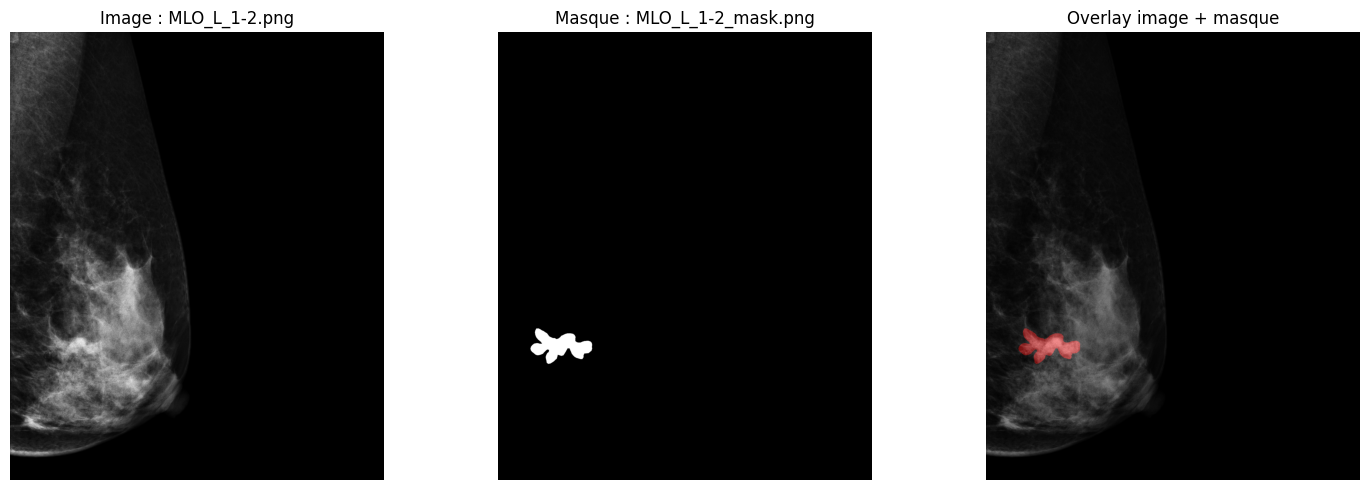

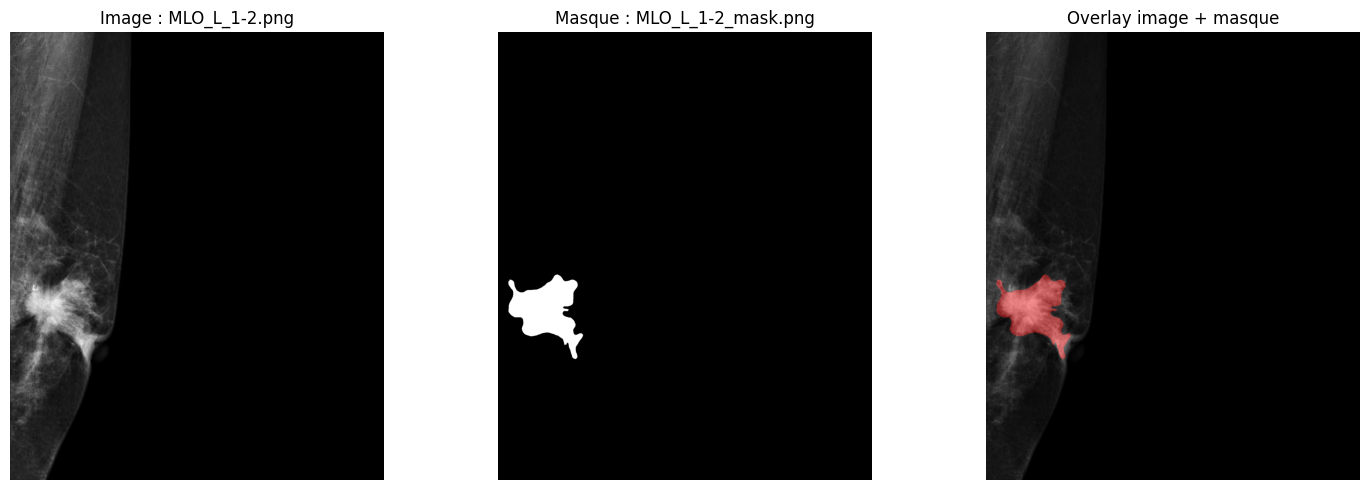

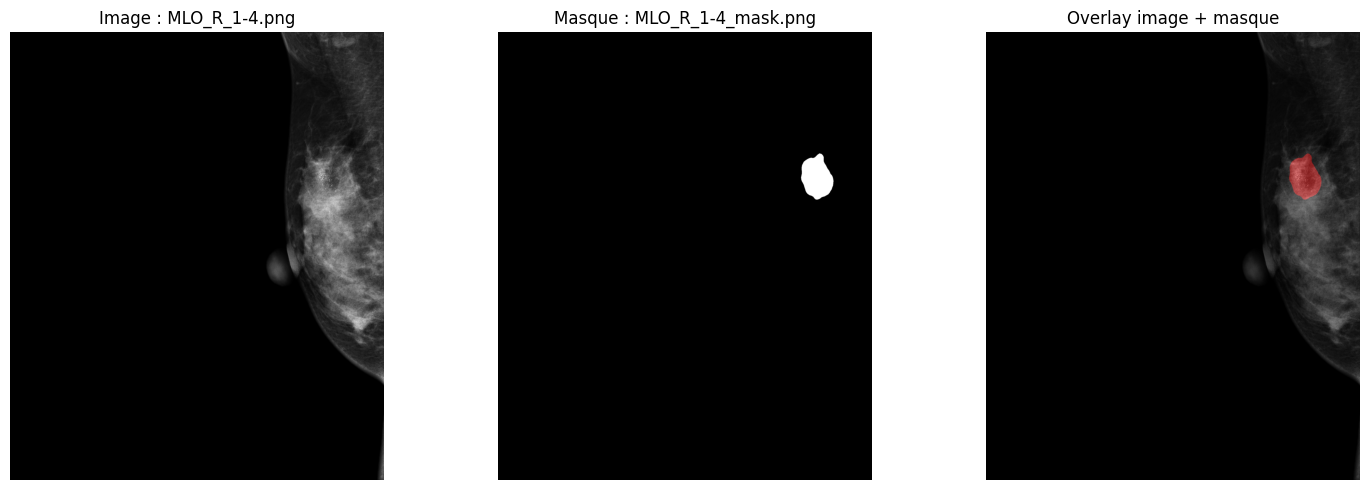

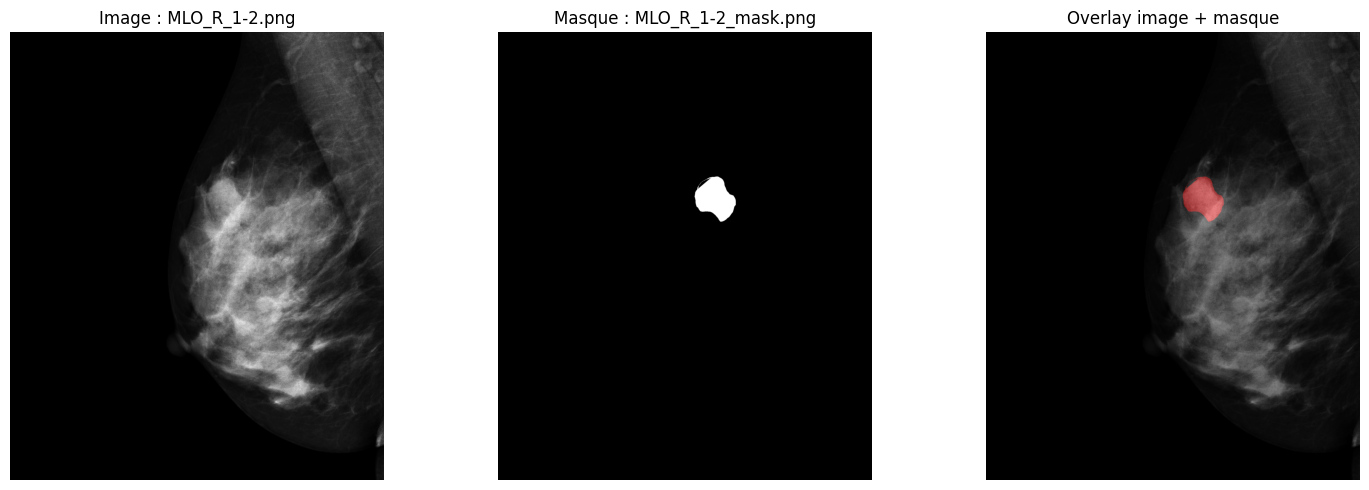

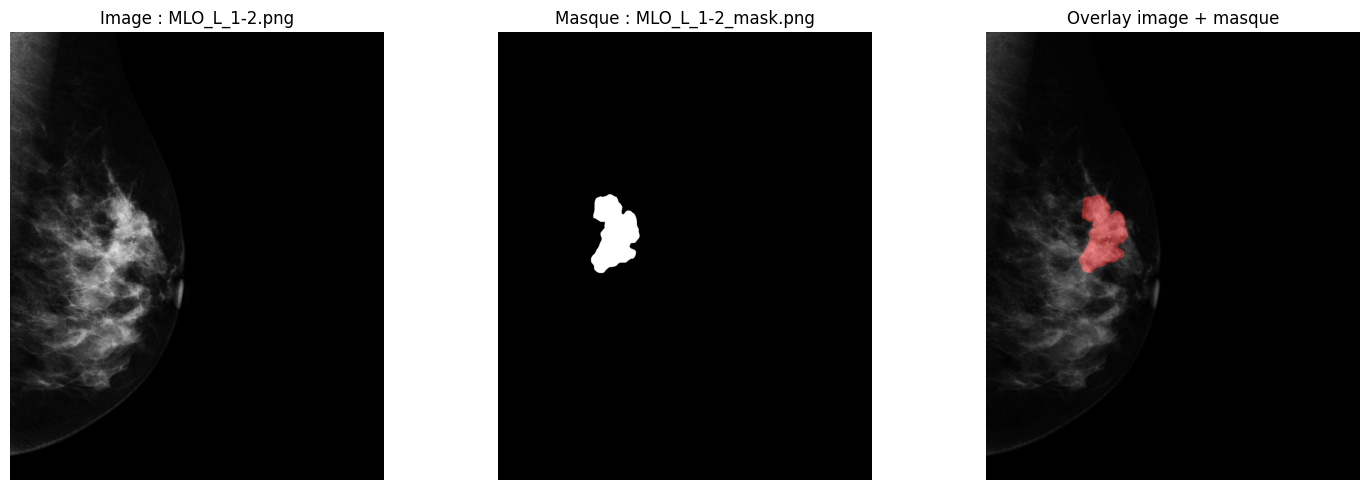

In [1]:
# V√©rification visuelle de la superposition image ‚Üî masque
# Affiche quelques paires (image, masque) et leur overlay pour v√©rifier l‚Äôalignement.

import random
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image

# 1) Chemins √† adapter si besoin
DATA_ROOT  = Path(r"C:\Users\PC\Desktop\DATASET_CLEAN")
IMAGE_ROOT = DATA_ROOT / "images"
MASK_ROOT  = DATA_ROOT / "masks"

# 2) R√©cup√©rer quelques images al√©atoires
all_img_paths = list(IMAGE_ROOT.rglob("*.png"))
sample_paths = random.sample(all_img_paths, k=5)  # par exemple 5 exemples

# 3) Pour chaque image, trouver le chemin du masque correspondant
def get_mask_path(img_path: Path) -> Path:
    """
    Suppose que le masque se trouve dans le m√™me sous-dossier sous 'masks/'
    et porte le suffixe '_mask.png' sur le nom de fichier.
    """
    # Ex : C:/‚Ä¶/images/patient123/IMG_001.png ‚Üí C:/‚Ä¶/masks/patient123/IMG_001_mask.png
    rel = img_path.relative_to(IMAGE_ROOT)
    mask_folder = MASK_ROOT / rel.parent
    mask_name   = rel.stem + "_mask.png"
    return mask_folder / mask_name

# 4) Fonction pour afficher l‚Äôimage, le masque, et l‚Äôoverlay
def show_image_and_mask(img_path: Path, mask_path: Path):
    img = np.array(Image.open(img_path).convert("RGB"))
    msk = np.array(Image.open(mask_path).convert("L"))  # niveaux de gris 0/255

    # Cr√©er une image coloris√©e du masque : on met du rouge o√π msk>0
    mask_rgb = np.zeros_like(img)
    mask_rgb[..., 0] = (msk > 0) * 255  # canal rouge = 255 l√† o√π masque est 1

    # Affichage en 3 subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(img)
    axes[0].set_title(f"Image : {img_path.name}")
    axes[0].axis("off")

    axes[1].imshow(msk, cmap="gray")
    axes[1].set_title(f"Masque : {mask_path.name}")
    axes[1].axis("off")

    axes[2].imshow(img)
    axes[2].imshow(mask_rgb, alpha=0.4)  # overlay semi-transparent
    axes[2].set_title("Overlay image + masque")
    axes[2].axis("off")

    plt.tight_layout()
    plt.show()

# 5) Boucle sur l‚Äô√©chantillon
for img_path in sample_paths:
    mask_path = get_mask_path(img_path)
    if not mask_path.exists():
        print(f"‚ö†Ô∏è Masque introuvable pour {img_path}")
        continue
    show_image_and_mask(img_path, mask_path)


In [2]:
import os
from pathlib import Path
from PIL import Image

# 1) Racine des dossiers
DATA_ROOT  = Path(r"C:\Users\PC\Desktop\DATASET_CLEAN")
IMAGE_ROOT = DATA_ROOT / "images"
MASK_ROOT  = DATA_ROOT / "masks"

# 2) Fonction pour r√©cup√©rer le chemin du masque √† partir de celui de l'image
def get_mask_path(img_path: Path) -> Path:
    rel = img_path.relative_to(IMAGE_ROOT)
    mask_folder = MASK_ROOT / rel.parent
    mask_name   = rel.stem + "_mask.png"
    return mask_folder / mask_name

# 3) Scanner tout et lister les paires dont la taille diff√®re
diff_sizes = []
for img_path in IMAGE_ROOT.rglob("*.png"):
    mask_path = get_mask_path(img_path)
    if not mask_path.exists():
        diff_sizes.append((img_path, "masque introuvable"))
        continue

    img = Image.open(img_path)
    msk = Image.open(mask_path)

    if img.size != msk.size:
        # .size donne (width, height)
        diff_sizes.append((img_path, img.size, msk.size))

# 4) R√©sultat
if not diff_sizes:
    print("‚úîÔ∏è Toutes les images et leurs masques ont la m√™me taille.")
else:
    print("‚ùå Discr√©panes d√©tect√©es :")
    for item in diff_sizes[:10]:  # n‚Äôen montrer que quelques-unes si beaucoup
        print(" ‚Ä¢", item)
    print(f"‚Ä¶ ({len(diff_sizes)} paires au total).")


‚úîÔ∏è Toutes les images et leurs masques ont la m√™me taille.


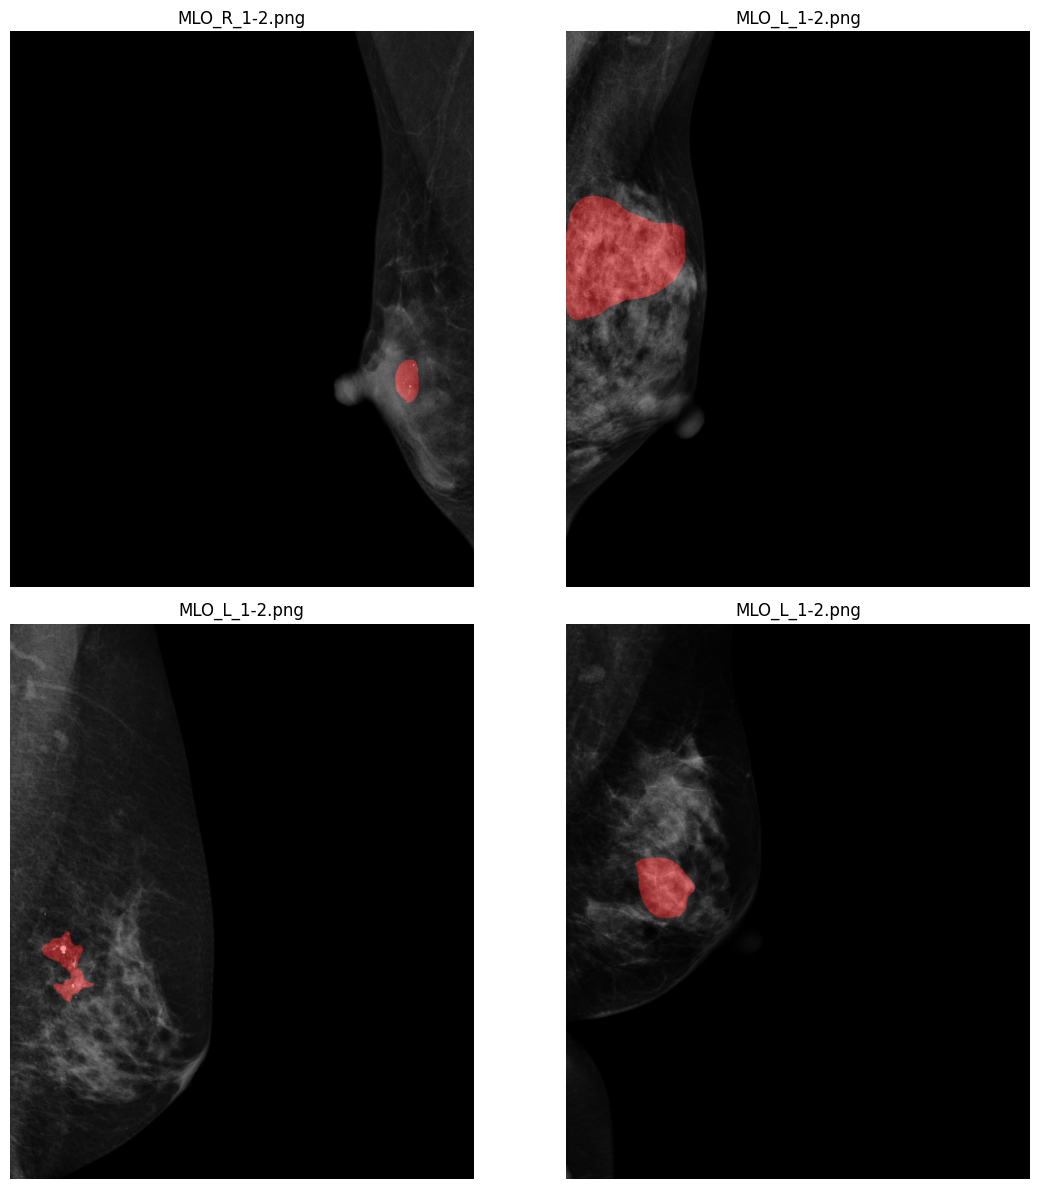

In [7]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ CONFIGURATION ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
DATA_ROOT   = Path(r"C:\Users\PC\Desktop\DATASET_CLEAN")
IMAGE_ROOT  = DATA_ROOT / "images"
MASK_ROOT   = DATA_ROOT / "masks"

# Nombre d‚Äôexemples √† afficher
NUM_EXAMPLES = 4

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ R√âCUP√âRER LA LISTE DES IMAGES ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# On liste r√©cursivement tous les fichiers .png sous IMAGE_ROOT
all_image_paths = sorted(list(IMAGE_ROOT.rglob("*.png")))

# Si vous voulez des exemples al√©atoires, d√©commentez :
# random.seed(42)
# random.shuffle(all_image_paths)

# On ne garde que les NUM_EXAMPLES premiers
selected_paths = all_image_paths[:NUM_EXAMPLES]

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ FONCTION D‚ÄôAFFICHAGE ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
def show_image_and_mask(img_path: Path):
    """
    Charge l‚Äôimage et son masque correspondant, puis affiche
    l‚Äôimage RGB en arri√®re-plan et le masque semi-transparent en rouge.
    """
    # Chemin du masque : m√™me dossier dans MASK_ROOT, nom_ stem + "_mask.png"
    rel = img_path.relative_to(IMAGE_ROOT)
    mask_path = MASK_ROOT / rel.parent / f"{img_path.stem}_mask.png"

    # Charger image et masque
    img = np.array(Image.open(img_path).convert("RGB"))
    msk = np.array(Image.open(mask_path).convert("L"))

    # Binariser le masque
    msk_bin = (msk > 0).astype(np.uint8)

    # Affichage
    plt.imshow(img, cmap="gray")
    # Calque rouge : [1,0,0] l√† o√π le masque = 1
    overlay = np.zeros((msk_bin.shape[0], msk_bin.shape[1], 3), dtype=np.float32)
    overlay[..., 0] = msk_bin  # canal rouge
    plt.imshow(overlay, alpha=0.4)
    plt.title(img_path.name)
    plt.axis("off")


# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ AFFICHER LES EXEMPLES EN GRID ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
rows = int(np.ceil(NUM_EXAMPLES / 2))
cols = 2 if NUM_EXAMPLES > 1 else 1
plt.figure(figsize=(cols * 6, rows * 6))

for idx, img_path in enumerate(selected_paths):
    plt.subplot(rows, cols, idx + 1)
    show_image_and_mask(img_path)

plt.tight_layout()
plt.show()


Nombre d‚Äôimages annot√©es : 1385
Surface masqu√©e ‚Äì min :0.02 %, max :21.86 %, moy :1.90 %


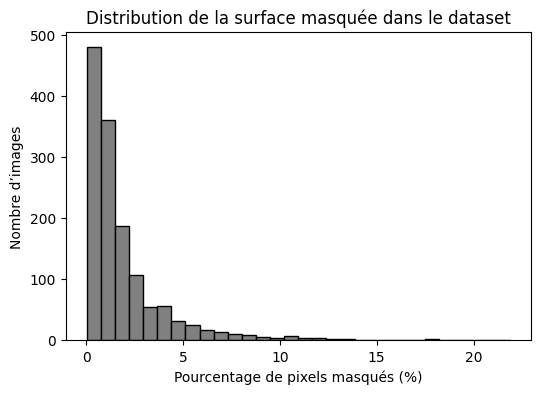

In [6]:
import random
import numpy as np
from pathlib import Path
from PIL import Image

# 1) Racines
DATA_ROOT  = Path(r"C:\Users\PC\Desktop\DATASET_CLEAN")
IMAGE_ROOT = DATA_ROOT / "images"
MASK_ROOT  = DATA_ROOT / "masks"

def get_mask_path(img_path: Path) -> Path:
    rel = img_path.relative_to(IMAGE_ROOT)
    return (MASK_ROOT / rel.parent / f"{rel.stem}_mask.png")

# 2) √âchantillon tout le jeu
all_paths = list(IMAGE_ROOT.rglob("*.png"))
ratios = []

for img_path in all_paths:
    mask_path = get_mask_path(img_path)
    if not mask_path.exists():
        continue
    msk = np.array(Image.open(mask_path).convert("L"))
    bin_mask = (msk > 0)
    ratio = bin_mask.sum() / (bin_mask.shape[0] * bin_mask.shape[1])
    ratios.append(ratio)

# 3) Statistiques
ratios = np.array(ratios)
print(f"Nombre d‚Äôimages annot√©es : {len(ratios)}")
print(f"Surface masqu√©e ‚Äì min :{ratios.min()*100:.2f} %, max :{ratios.max()*100:.2f} %, moy :{ratios.mean()*100:.2f} %")

# 4) Histogramme des ratios
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.hist(ratios*100, bins=30, color="gray", edgecolor="black")
plt.xlabel("Pourcentage de pixels masqu√©s (%)")
plt.ylabel("Nombre d‚Äôimages")
plt.title("Distribution de la surface masqu√©e dans le dataset")
plt.show()


In [1]:
import numpy as np

def extract_patch(img: np.ndarray, msk: np.ndarray, patch_size: int = 160):
    """
    img : numpy array H√óW√ó3 (RGB)
    msk : numpy array H√óW (0 ou 255)
    patch_size : taille du patch carr√© √† extraire (en pixels)
    Retourne (img_patch, msk_patch), chacun de taille patch_size√ópatch_size.
    """
    # 1) Trouver le centre de la l√©sion (coordonn√©es moyennes des pixels > 0 dans msk)
    ys, xs = np.where(msk > 0)
    h, w = img.shape[:2]
    if len(xs) == 0:
        # Pas de l√©sion annot√©e : on prend le centre de l'image
        cy, cx = h // 2, w // 2
    else:
        cy, cx = int(np.mean(ys)), int(np.mean(xs))

    # 2) Calculer les bords du patch de taille patch_size centr√© sur (cy, cx)
    half = patch_size // 2
    y0 = max(0, cy - half)
    x0 = max(0, cx - half)
    y1 = y0 + patch_size
    x1 = x0 + patch_size

    # 3) Si on sort de l'image, recaler
    if y1 > h:
        y1 = h
        y0 = h - patch_size
    if x1 > w:
        x1 = w
        x0 = w - patch_size
    y0, x0 = max(0, y0), max(0, x0)

    img_patch = img[y0:y0+patch_size, x0:x0+patch_size]
    msk_patch = msk[y0:y0+patch_size, x0:x0+patch_size]

    return img_patch, msk_patch


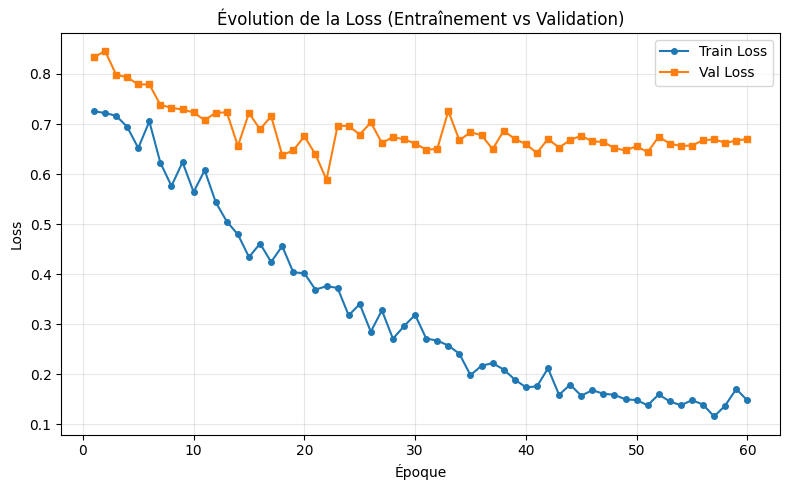

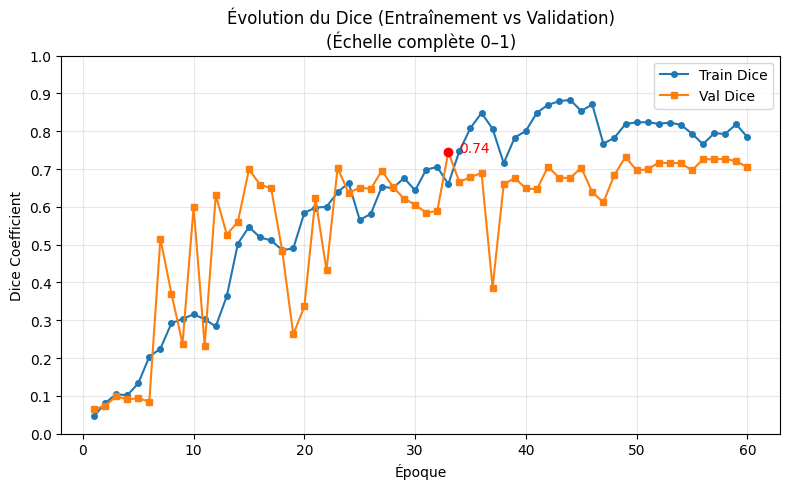

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Listes extraites de votre historique (epoch 1 √† 60)
epochs = list(range(1, 61))

train_losses = [
    0.7256, 0.7220, 0.7166, 0.6945, 0.6520, 0.7052, 0.6226, 0.5762, 0.6239, 0.5643,
    0.6076, 0.5438, 0.5051, 0.4795, 0.4342, 0.4612, 0.4245, 0.4561, 0.4038, 0.4020,
    0.3692, 0.3761, 0.3726, 0.3178, 0.3404, 0.2852, 0.3279, 0.2711, 0.2963, 0.3189,
    0.2716, 0.2674, 0.2576, 0.2410, 0.1984, 0.2173, 0.2224, 0.2096, 0.1897, 0.1741,
    0.1758, 0.2121, 0.1591, 0.1794, 0.1574, 0.1684, 0.1613, 0.1591, 0.1500, 0.1487,
    0.1382, 0.1598, 0.1459, 0.1383, 0.1485, 0.1396, 0.1159, 0.1376, 0.1708, 0.1479,
]

train_dices = [
    0.0456, 0.0805, 0.1047, 0.1015, 0.1332, 0.2038, 0.2250, 0.2923, 0.3034, 0.3159,
    0.3028, 0.2837, 0.3641, 0.5030, 0.5469, 0.5192, 0.5113, 0.4856, 0.4902, 0.5843,
    0.5980, 0.6001, 0.6386, 0.6634, 0.5654, 0.5815, 0.6535, 0.6493, 0.6766, 0.6434,
    0.6986, 0.7055, 0.6601, 0.7478, 0.8085, 0.8483, 0.8065, 0.7156, 0.7833, 0.8009,
    0.8491, 0.8698, 0.8794, 0.8831, 0.8538, 0.8708, 0.7671, 0.7828, 0.8193, 0.8235,
    0.8241, 0.8195, 0.8230, 0.8169, 0.7937, 0.7657, 0.7947, 0.7932, 0.8184, 0.7844,
]

val_losses = [
    0.8335, 0.8457, 0.7989, 0.7933, 0.7791, 0.7791, 0.7385, 0.7324, 0.7291, 0.7231,
    0.7077, 0.7227, 0.7232, 0.6559, 0.7222, 0.6893, 0.7157, 0.6381, 0.6472, 0.6756,
    0.6395, 0.5887, 0.6965, 0.6961, 0.6791, 0.7032, 0.6624, 0.6739, 0.6695, 0.6610,
    0.6487, 0.6503, 0.7259, 0.6674, 0.6837, 0.6776, 0.6498, 0.6867, 0.6703, 0.6598,
    0.6421, 0.6704, 0.6528, 0.6681, 0.6766, 0.6654, 0.6642, 0.6519, 0.6473, 0.6557,
    0.6439, 0.6747, 0.6607, 0.6562, 0.6571, 0.6676, 0.6695, 0.6626, 0.6666, 0.6704,
]

val_dices = [
    0.0652, 0.0731, 0.0992, 0.0907, 0.0939, 0.0847, 0.5160, 0.3702, 0.2382, 0.6001,
    0.2333, 0.6309, 0.5267, 0.5610, 0.6992, 0.6587, 0.6493, 0.4836, 0.2629, 0.3366,
    0.6226, 0.4324, 0.7026, 0.6369, 0.6511, 0.6474, 0.6960, 0.6529, 0.6216, 0.6058,
    0.5843, 0.5891, 0.7448, 0.6656, 0.6790, 0.6893, 0.3864, 0.6596, 0.6764, 0.6486,
    0.6466, 0.7061, 0.6775, 0.6759, 0.7039, 0.6387, 0.6120, 0.6847, 0.7320, 0.6966,
    0.6990, 0.7173, 0.7153, 0.7161, 0.6963, 0.7261, 0.7258, 0.7274, 0.7204, 0.7054,
]

# 2) Courbe de la Loss (train vs val)
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_losses, label="Train Loss", marker='o', markersize=4)
plt.plot(epochs, val_losses,   label="Val Loss",   marker='s', markersize=4)
plt.xlabel("√âpoque")
plt.ylabel("Loss")
plt.title("√âvolution de la Loss (Entra√Ænement vs Validation)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 3) Courbe du Dice (train vs val) sur √©chelle 0‚Äì1 avec ticks tous les 0,1
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_dices, label="Train Dice", marker='o', markersize=4)
plt.plot(epochs, val_dices,   label="Val Dice",   marker='s', markersize=4)

# Mettre en √©vidence le point maximal √† l'√©poque 33 (val_dice = 0.7448)
best_epoch = 33
best_val_dice = 0.7448
plt.scatter([best_epoch], [best_val_dice], color='red', zorder=5)
plt.text(best_epoch + 1, best_val_dice, "0.74", color='red')

# √âchelle de 0 √† 1, ticks par pas de 0,1
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.01, 0.1))

plt.xlabel("√âpoque")
plt.ylabel("Dice Coefficient")
plt.title("√âvolution du Dice (Entra√Ænement vs Validation)\n(√âchelle compl√®te 0‚Äì1)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


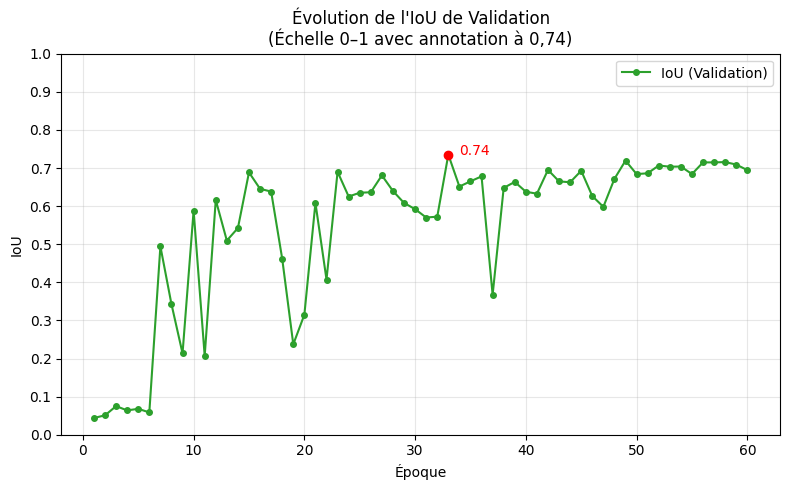

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Liste des √©poques
epochs = list(range(1, 61))

# 2) Liste des IoU de validation (extraits de l‚Äôhistorique)
val_ious = [
    0.0440, 0.0509, 0.0751, 0.0638, 0.0680, 0.0585, 0.4944, 0.3427, 0.2136, 0.5882,
    0.2067, 0.6161, 0.5096, 0.5425, 0.6885, 0.6454, 0.6382, 0.4618, 0.2373, 0.3149,
    0.6084, 0.4073, 0.6901, 0.6252, 0.6351, 0.6364, 0.6807, 0.6397, 0.6084, 0.5921,
    0.5701, 0.5723, 0.7351, 0.6514, 0.6651, 0.6781, 0.3672, 0.6479, 0.6636, 0.6378,
    0.6326, 0.6951, 0.6649, 0.6627, 0.6928, 0.6264, 0.5982, 0.6716, 0.7194, 0.6841,
    0.6862, 0.7066, 0.7035, 0.7039, 0.6842, 0.7148, 0.7148, 0.7156, 0.7091, 0.6945,
]

# 3) Tracer la courbe d‚ÄôIoU de validation
plt.figure(figsize=(8, 5))
plt.plot(epochs, val_ious, label="IoU (Validation)", marker='o', markersize=4, color='tab:green')

# Mettre en √©vidence le point maximal (√©poque 33, IoU = 0.7351)
best_epoch = 33
best_val_iou = 0.7351
plt.scatter([best_epoch], [best_val_iou], color='red', zorder=5)
plt.text(best_epoch + 1, best_val_iou, "0.74", color='red')

# √âchelle de 0 √† 1, graduations tous les 0,1
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.01, 0.1))

plt.xlabel("√âpoque")
plt.ylabel("IoU")
plt.title("√âvolution de l'IoU de Validation\n(√âchelle 0‚Äì1 avec annotation √† 0,74)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


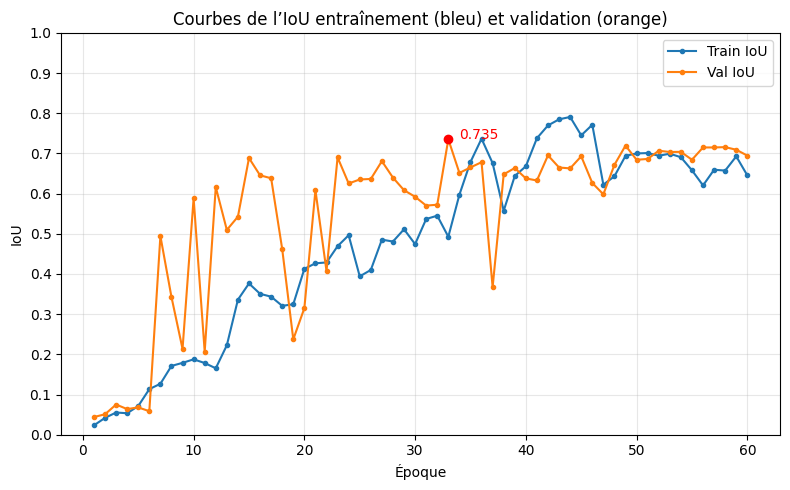

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Dice d'entra√Ænement sur 60 √©poques (extrait du log)
train_dices = np.array([
    0.0456, 0.0805, 0.1047, 0.1015, 0.1332, 0.2038, 0.2250, 0.2923, 0.3034, 0.3159,
    0.3028, 0.2837, 0.3641, 0.5030, 0.5469, 0.5192, 0.5113, 0.4856, 0.4902, 0.5843,
    0.5980, 0.6001, 0.6386, 0.6634, 0.5654, 0.5815, 0.6535, 0.6493, 0.6766, 0.6434,
    0.6986, 0.7055, 0.6601, 0.7478, 0.8085, 0.8483, 0.8065, 0.7156, 0.7833, 0.8009,
    0.8491, 0.8698, 0.8794, 0.8831, 0.8538, 0.8708, 0.7671, 0.7828, 0.8193, 0.8235,
    0.8241, 0.8195, 0.8230, 0.8169, 0.7937, 0.7657, 0.7947, 0.7932, 0.8184, 0.7844
])

# Approximation Train IoU = Dice / (2 - Dice)
train_ious = train_dices / (2 - train_dices)

# IoU de validation sur 60 √©poques (extrait du log)
val_ious = np.array([
    0.0440, 0.0509, 0.0751, 0.0638, 0.0680, 0.0585, 0.4944, 0.3427, 0.2136, 0.5882,
    0.2067, 0.6161, 0.5096, 0.5425, 0.6885, 0.6454, 0.6382, 0.4618, 0.2373, 0.3149,
    0.6084, 0.4073, 0.6901, 0.6252, 0.6351, 0.6364, 0.6807, 0.6397, 0.6084, 0.5921,
    0.5701, 0.5723, 0.7351, 0.6514, 0.6651, 0.6781, 0.3672, 0.6479, 0.6636, 0.6378,
    0.6326, 0.6951, 0.6649, 0.6627, 0.6928, 0.6264, 0.5982, 0.6716, 0.7194, 0.6841,
    0.6862, 0.7066, 0.7035, 0.7039, 0.6842, 0.7148, 0.7148, 0.7156, 0.7091, 0.6945
])

epochs = np.arange(1, 61)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_ious, label="Train IoU", color='tab:blue', marker='o', markersize=3)
plt.plot(epochs, val_ious,   label="Val IoU",   color='tab:orange', marker='o', markersize=3)

# Mettre en √©vidence le meilleur IoU validation (0,735 √† l'√©poque 33)
best_epoch = 33
best_val_iou = 0.7351
plt.scatter([best_epoch], [best_val_iou], color='red', zorder=5)
plt.text(best_epoch + 1, best_val_iou, "0.735", color='red')

plt.title("Courbes de l‚ÄôIoU entra√Ænement (bleu) et validation (orange)")
plt.xlabel("√âpoque")
plt.ylabel("IoU")
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.01, 0.1))
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_19108\1900282482.py:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(checkpoint_path, map_location=DEVICE)



‚Üí Nombre total d‚Äôexemples ‚Äúmasque non-vide‚Äù d√©tect√©s : 1357
‚Üí On va en afficher (tir√© au sort) 5

=== Exemple 1/5 : D1-0976 ‚Äì MLO_R ===
‚Üí Masque vrai pour mask_MLO_R.png : min=0, max=255
‚Üí Probabilit√© pr√©dite (min, max) = (0.0000, 0.0147)
=== Exemple 2/5 : D2-0735 ‚Äì MLO_L ===
‚Üí Masque vrai pour mask_MLO_L.png : min=0, max=255
‚Üí Probabilit√© pr√©dite (min, max) = (0.0000, 1.0000)
=== Exemple 3/5 : D1-1457 ‚Äì MLO_R ===
‚Üí Masque vrai pour mask_MLO_R.png : min=0, max=255
‚Üí Probabilit√© pr√©dite (min, max) = (0.0000, 1.0000)
=== Exemple 4/5 : D1-0290 ‚Äì MLO_R ===
‚Üí Masque vrai pour mask_MLO_R.png : min=0, max=255
‚Üí Probabilit√© pr√©dite (min, max) = (0.0000, 0.0147)
=== Exemple 5/5 : D2-0308 ‚Äì MLO_L ===
‚Üí Masque vrai pour mask_MLO_L.png : min=0, max=255
‚Üí Probabilit√© pr√©dite (min, max) = (0.0000, 1.0000)


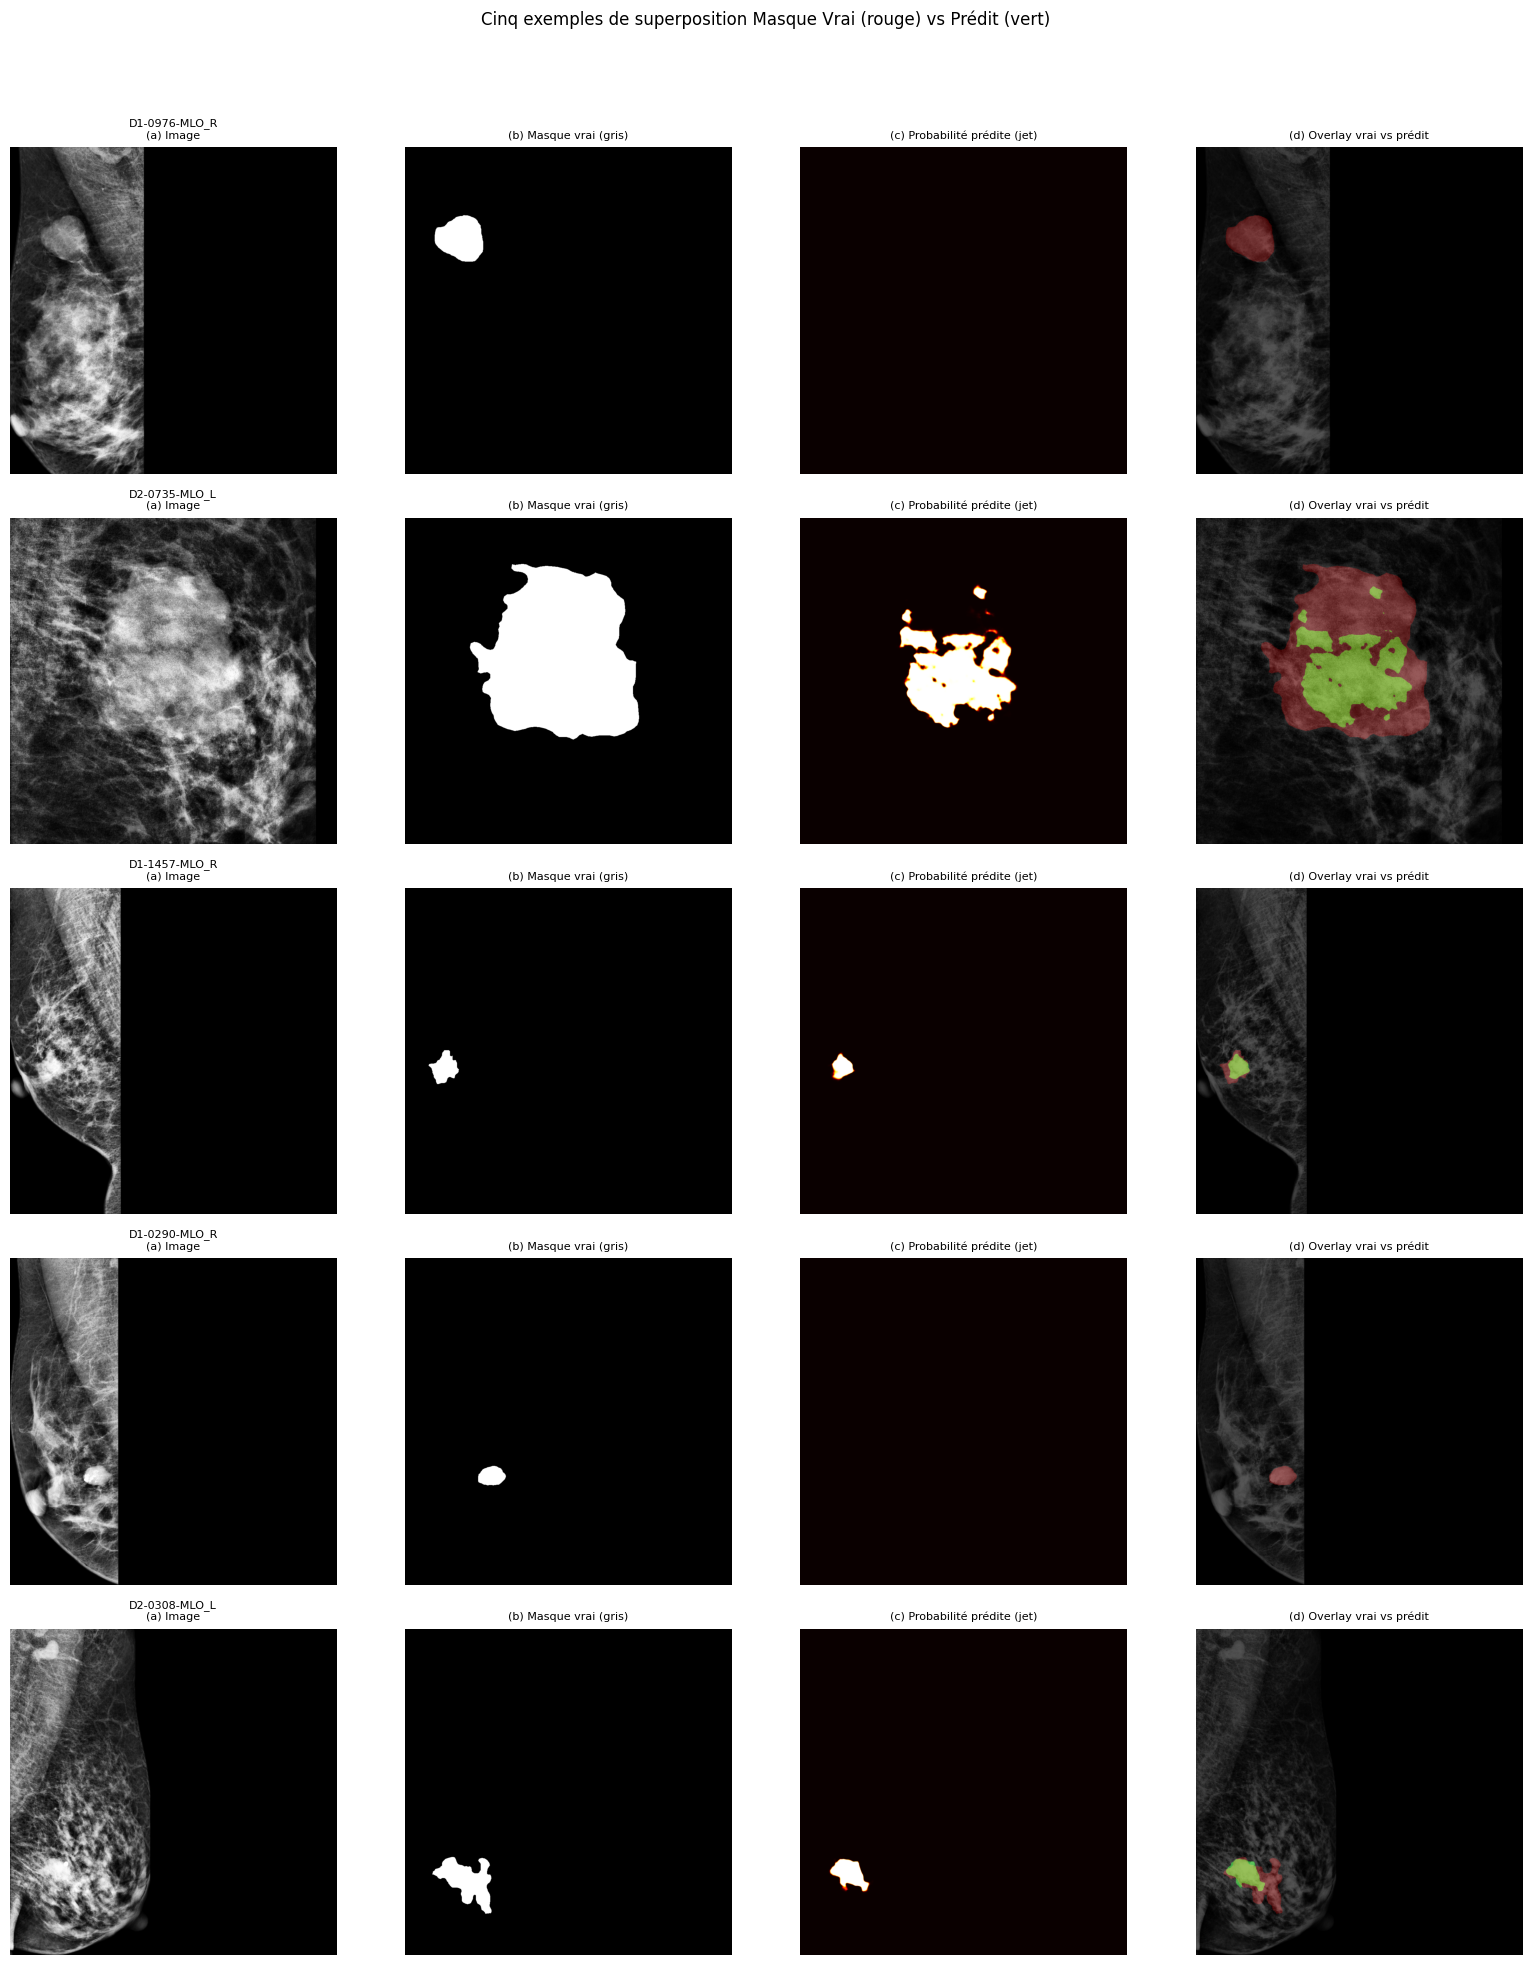

In [31]:
# -------------------------------------------------------------------
# debug_overlay_non_empty.py
# -------------------------------------------------------------------
import os
import random
import cv2
import numpy as np
import torch
import segmentation_models_pytorch as smp
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# 0. Configuration : adaptez ces chemins √† votre machine
# ---------------------------------------------------------
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dossier racine o√π se trouvent les sous-dossiers D*-XXXX
DATA_ROOT = r"C:\Users\PC\Desktop\dataset_final_pp"

# Chemin vers votre checkpoint "best_dice.pth"
CHECKPOINT_PATH = r"C:\Users\PC\Downloads\AI_breast_cancer\checkpoints_256_unet_subset\best_dice.pth"

# Nombre d‚Äôexemples √† afficher
NUM_EXAMPLES = 5

# ---------------------------------------------------------
# 1. Charger le mod√®le U-Net entra√Æn√©
# ---------------------------------------------------------
def load_trained_unet(checkpoint_path: str) -> torch.nn.Module:
    model = smp.Unet(
        encoder_name="resnet34",
        encoder_weights="imagenet",
        in_channels=3,
        classes=1,
        activation=None
    ).to(DEVICE)

    state = torch.load(checkpoint_path, map_location=DEVICE)
    if isinstance(state, dict) and "model" in state:
        model.load_state_dict(state["model"])
    else:
        model.load_state_dict(state)
    model.eval()
    return model

# ---------------------------------------------------------
# 2. Charger une image + son masque ‚Äúvrai‚Äù, et imprimer stats
# ---------------------------------------------------------
def load_image_and_mask(image_path: str, mask_path: str):
    img_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img_gray is None:
        raise FileNotFoundError(f"[ERREUR] Impossible de lire l‚Äôimage : {image_path}")
    img_rgb = cv2.merge([img_gray, img_gray, img_gray])
    img_norm = img_rgb.astype(np.float32) / 255.0
    img_tensor = torch.from_numpy(img_norm.transpose(2,0,1)).unsqueeze(0).to(DEVICE)

    mask_gray = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if mask_gray is None:
        raise FileNotFoundError(f"[ERREUR] Impossible de lire le masque : {mask_path}")

    # Afficher les valeurs min/max du masque ‚Äúvrai‚Äù
    print(f"‚Üí Masque vrai pour {os.path.basename(mask_path)} : min={int(mask_gray.min())}, max={int(mask_gray.max())}")

    true_mask = (mask_gray > 127).astype(np.uint8)
    return img_tensor, true_mask, mask_gray

# ---------------------------------------------------------
# 3. Calculer le masque pr√©dit et imprimer stats
# ---------------------------------------------------------
def predict_mask_and_stats(model: torch.nn.Module, img_tensor: torch.Tensor):
    with torch.no_grad():
        logits = model(img_tensor)            # (1,1,256,256)
        probs  = torch.sigmoid(logits)        # (1,1,256,256)
        probs_np = probs.squeeze(0).squeeze(0).cpu().numpy()
        print(f"‚Üí Probabilit√© pr√©dite (min, max) = ({probs_np.min():.4f}, {probs_np.max():.4f})")
        pred_mask = (probs_np > 0.5).astype(np.uint8)
    return pred_mask, probs_np

# ---------------------------------------------------------
# 4. Afficher les 4 sous-figures pour un exemple
# ---------------------------------------------------------
def plot_four_panels(img_tensor, mask_gray, true_mask, probs_np, pred_mask, ax_row, title_prefix):
    """
    ax_row : liste de 4 AxesSubplot (1√ó4) pour dessiner.
    title_prefix : cha√Æne courte, ex. 'D1-0007-CC_L'.
    """
    # (a) Image d'entr√©e (grayscale)
    ax = ax_row[0]
    img_np = img_tensor.squeeze(0).cpu().numpy().transpose(1,2,0)  # (256,256,3)
    img_gray = img_np[:,:,0]
    ax.imshow(img_gray, cmap="gray")
    ax.set_title(f"{title_prefix}\n(a) Image", fontsize=8)
    ax.axis("off")

    # (b) Masque vrai en niveaux de gris
    ax = ax_row[1]
    ax.imshow(mask_gray, cmap="gray")
    ax.set_title("(b) Masque vrai (gris)", fontsize=8)
    ax.axis("off")

    # (c) Masque pr√©dit (probabilit√© en √©chelle de gris)
    ax = ax_row[2]
    ax.imshow(probs_np, cmap="hot", vmin=0, vmax=1)
    ax.set_title("(c) Probabilit√© pr√©dite (jet)", fontsize=8)
    ax.axis("off")

    # (d) Overlay vrai (rouge) vs pr√©dit (vert)
    ax = ax_row[3]
    # Calque rouge pour le masque vrai
    red_mask = np.zeros((true_mask.shape[0], true_mask.shape[1], 3), dtype=np.float32)
    red_mask[...,0] = true_mask
    # Calque vert pour le masque pr√©dit
    green_mask = np.zeros_like(red_mask)
    green_mask[...,1] = pred_mask
    ax.imshow(img_gray, cmap="gray")
    ax.imshow(red_mask,   alpha=0.4)
    ax.imshow(green_mask, alpha=0.4)
    ax.set_title("(d) Overlay vrai vs pr√©dit", fontsize=8)
    ax.axis("off")

# ---------------------------------------------------------
# 5. Construire la liste filtr√©e (seulement les masques non-vides)
# ---------------------------------------------------------
model = load_trained_unet(CHECKPOINT_PATH)

candidates = []
for patient_folder in os.listdir(DATA_ROOT):
    patient_dir = os.path.join(DATA_ROOT, patient_folder)
    if not os.path.isdir(patient_dir):
        continue
    # Cherche tous les fichiers "image_<view>.png" dans ce dossier
    for fname in os.listdir(patient_dir):
        if not fname.startswith("image_") or not fname.endswith(".png"):
            continue
        view = fname.replace("image_", "").replace(".png", "")
        image_path = os.path.join(patient_dir, f"image_{view}.png")
        mask_path  = os.path.join(patient_dir, f"mask_{view}.png")
        if not os.path.isfile(mask_path):
            continue

        # Lecture rapide du masque en grayscale pour v√©rifier s‚Äôil est non-vide
        mask_gray_quick = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        if mask_gray_quick is None:
            continue
        # On ne garde que si au moins un pixel > 127
        if int(mask_gray_quick.max()) > 127:
            candidates.append((patient_folder, view))

# S‚Äôil n‚Äôy a aucun masque ¬´ non-vide ¬ª, on arr√™te
if len(candidates) == 0:
    raise RuntimeError("Aucun masque ¬´ non-vid√© ¬ª trouv√© dans DATA_ROOT. V√©rifiez vos fichiers mask_*.png.")

# Tirage au sort de NUM_EXAMPLES exemples (ou moins si la liste est plus petite)
num_to_display = min(NUM_EXAMPLES, len(candidates))
selected = random.sample(candidates, num_to_display)

print(f"\n‚Üí Nombre total d‚Äôexemples ‚Äúmasque non-vide‚Äù d√©tect√©s : {len(candidates)}")
print(f"‚Üí On va en afficher (tir√© au sort) {num_to_display}\n")

# ---------------------------------------------------------
# 6. Pr√©parer la figure (num_to_display lignes √ó 4 colonnes)
# ---------------------------------------------------------
fig, axes = plt.subplots(num_to_display, 4, figsize=(16, 4 * num_to_display))
if num_to_display == 1:
    axes = np.expand_dims(axes, axis=0)  # pour avoir un tableau 2D mica (1√ó4)

# Pour chaque exemple, chargement, pr√©diction, affichage
for row_idx, (patient, view) in enumerate(selected):
    image_path = os.path.join(DATA_ROOT, patient, f"image_{view}.png")
    mask_path  = os.path.join(DATA_ROOT, patient, f"mask_{view}.png")

    print(f"=== Exemple {row_idx+1}/{num_to_display} : {patient} ‚Äì {view} ===")
    img_tensor, true_mask, mask_gray = load_image_and_mask(image_path, mask_path)
    pred_mask, probs_np = predict_mask_and_stats(model, img_tensor)

    title_prefix = f"{patient}-{view}"
    plot_four_panels(img_tensor, mask_gray, true_mask, probs_np, pred_mask,
                     axes[row_idx], title_prefix)

plt.suptitle("Cinq exemples de superposition Masque Vrai (rouge) vs Pr√©dit (vert)", fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
